### Run code instrctions:
Please place the code with 4 input files under the same directory.
We are using general packages for data science assignments, if there's some packages not in your environment,
please download them by conda install XXX or !pip install XXX.
Thanks

In [1]:
! pip install phik

   ---------------------------------------- 0.0/666.2 kB ? eta -:--:--
   - ------------------------------------- 30.7/666.2 kB 640.0 kB/s eta 0:00:01
   -------------- ------------------------- 245.8/666.2 kB 3.0 MB/s eta 0:00:01
   ------------------------------ --------- 501.8/666.2 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------  665.6/666.2 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 666.2/666.2 kB 3.8 MB/s eta 0:00:00


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tutorial4 import distplots
from tutorial4 import crosstabplots
from tutorial4 import regplots
from sklearn.feature_selection import mutual_info_classif
import phik
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import RandomizedSearchCV
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

Load data and remove "duration" from bank dataframe

In [3]:
bank_data = pd.read_csv('bank-additional-full.csv', sep=';')
store_data = pd.read_csv('store.csv')
bank_data = bank_data.drop('duration', axis=1)

In [4]:
numerical = ['age','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','previous','campaign']

continuous =['age','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','pdays']
discrete =['previous','campaign']

categorical =['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome',]

response = ['y']

Bank data EDA

(<Figure size 1200x900 with 8 Axes>,
 array([[<Axes: title={'center': 'age'}>,
         <Axes: title={'center': 'emp.var.rate'}>,
         <Axes: title={'center': 'cons.price.idx'}>],
        [<Axes: title={'center': 'cons.conf.idx'}>,
         <Axes: title={'center': 'euribor3m'}>,
         <Axes: title={'center': 'nr.employed'}>],
        [<Axes: title={'center': 'previous'}>,
         <Axes: title={'center': 'campaign'}>, <Axes: >]], dtype=object))

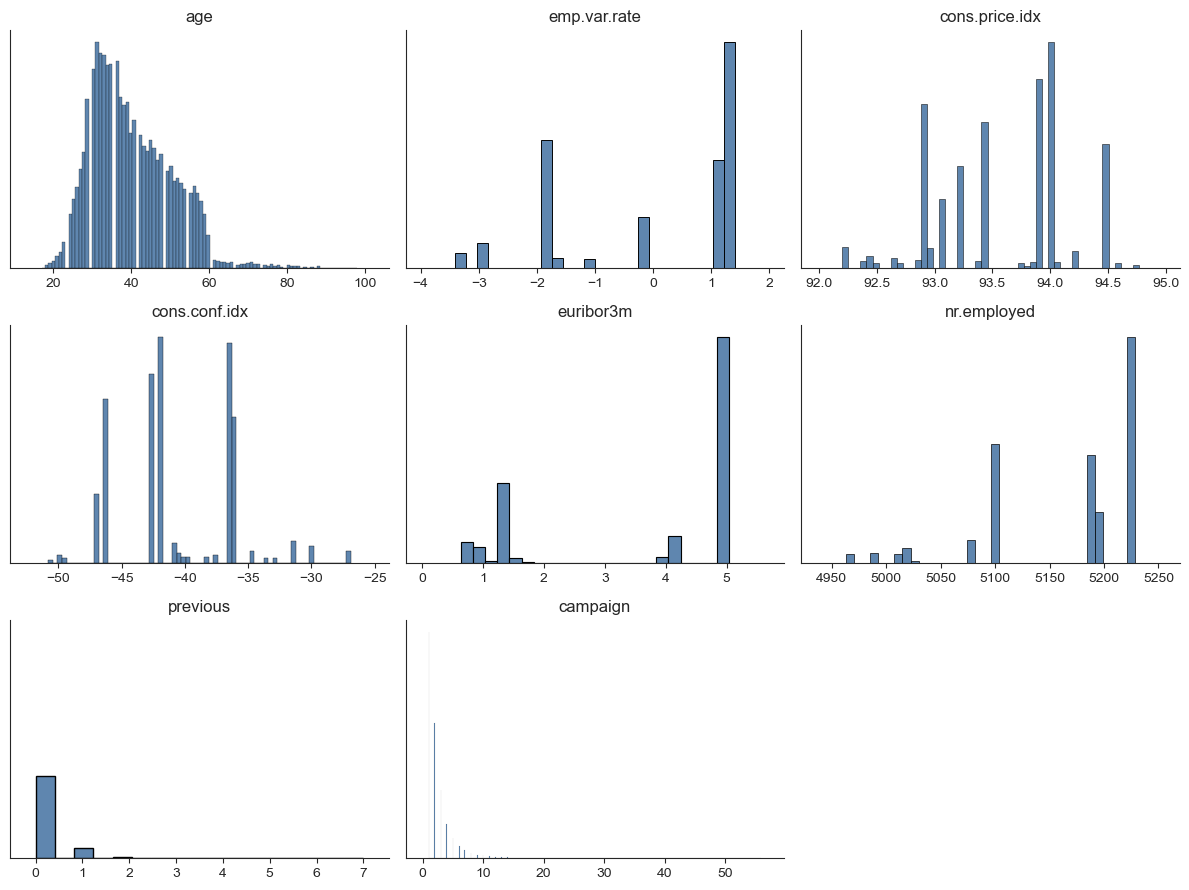

In [5]:
distplots(bank_data[numerical])

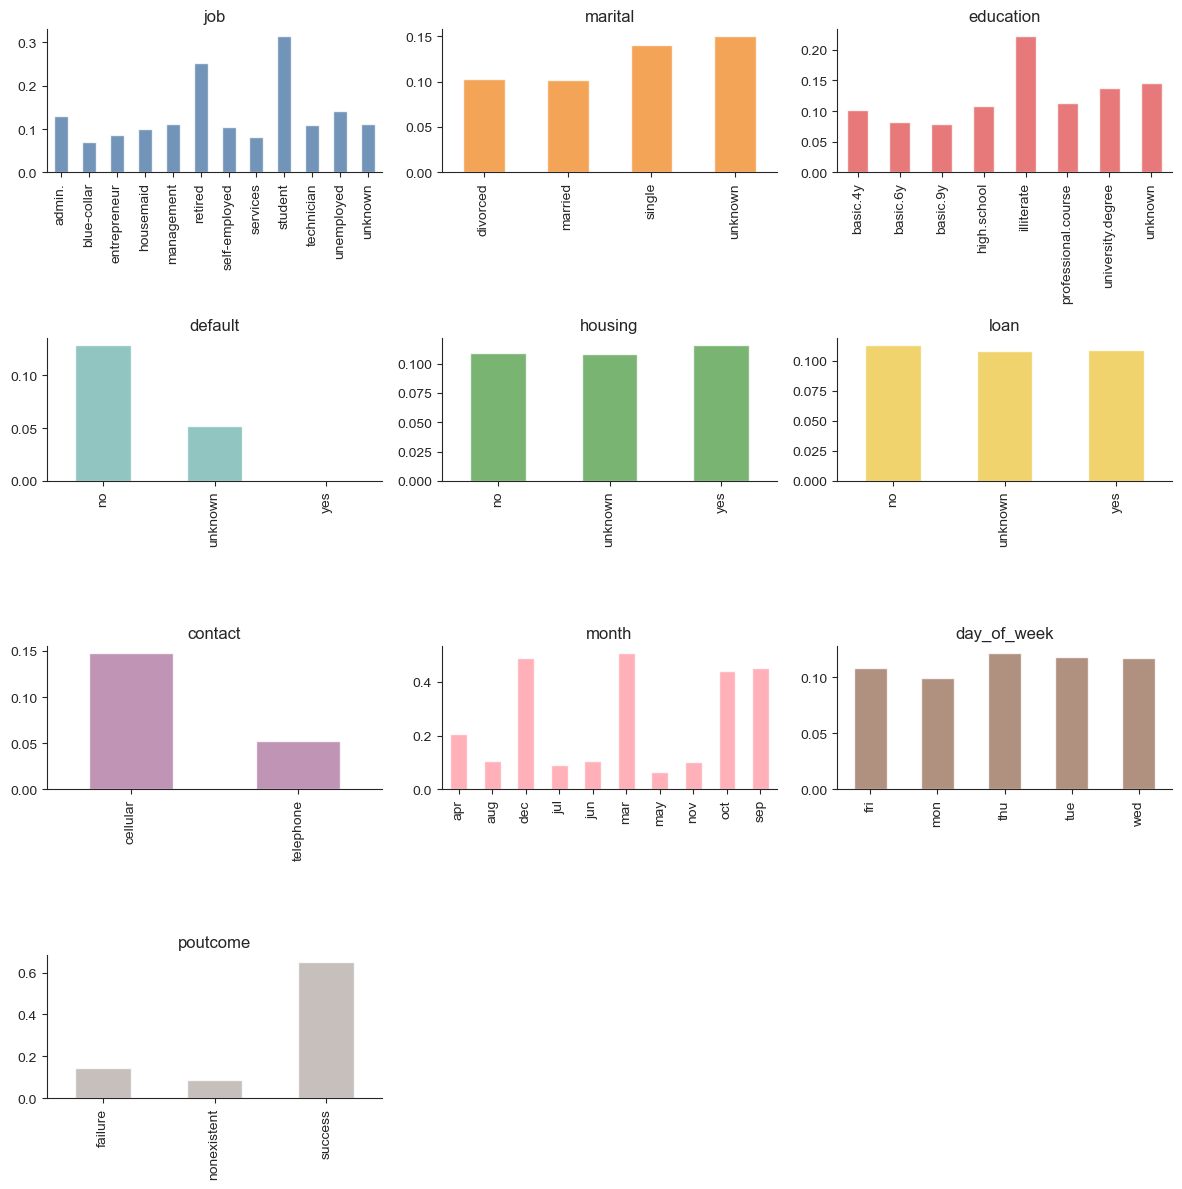

In [6]:
crosstabplots(bank_data[categorical],bank_data['y'])
plt.show()

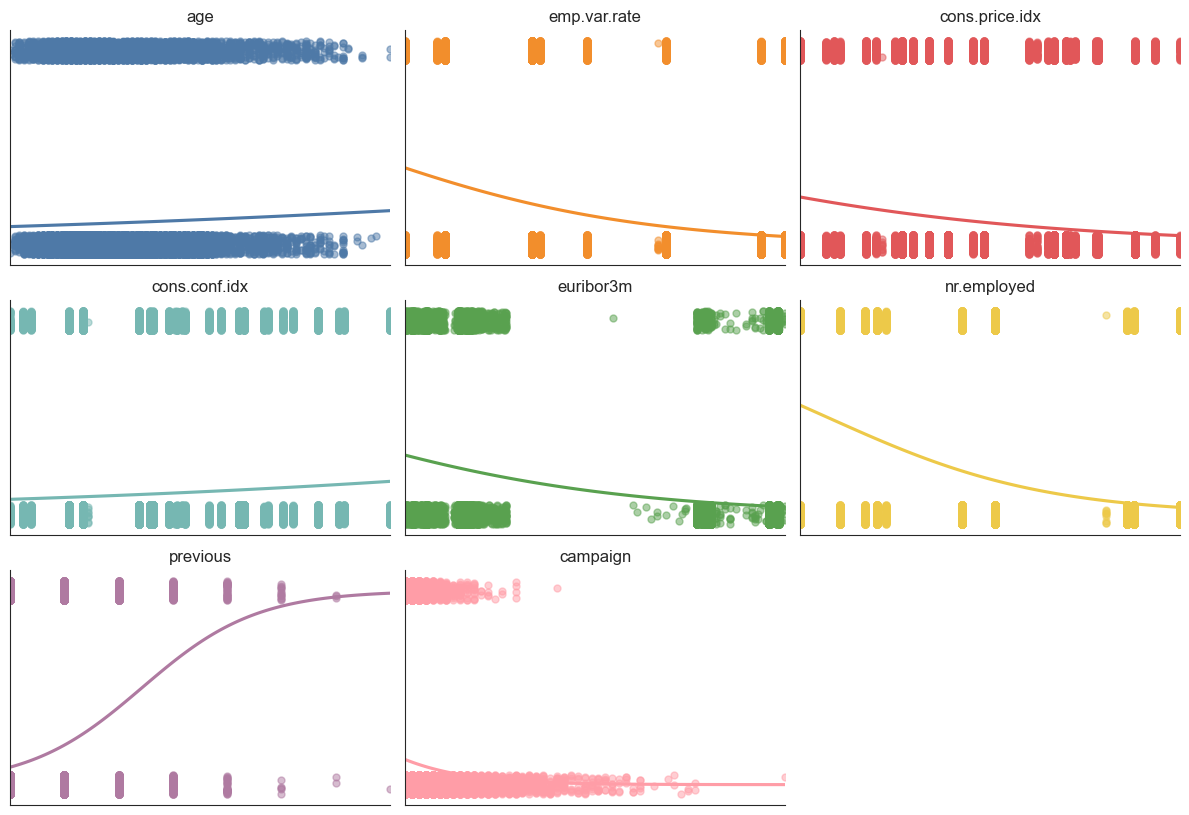

In [7]:
y = bank_data['y']
mapping = {'no':0,'yes':1}
y = y.map(mapping)
fig, ax = regplots(bank_data[numerical], y)
plt.show()

In [8]:
mi = mutual_info_classif(bank_data[numerical], y, random_state=1)
results1 = pd.DataFrame(mi, index=numerical, columns=['MI'])
results1.sort_values('MI',ascending=False)

,MI
euribor3m,0.074712
cons.price.idx,0.071068
cons.conf.idx,0.068594
nr.employed,0.062975
emp.var.rate,0.059062
previous,0.019346
age,0.015139
campaign,0.003756


In [9]:
bank_data.phik_matrix(interval_cols=numerical)['y'].sort_values(ascending=False).round(3)

y                 1.000
euribor3m         0.530
cons.conf.idx     0.501
emp.var.rate      0.474
nr.employed       0.383
pdays             0.382
month             0.357
cons.price.idx    0.336
previous          0.314
contact           0.225
age               0.224
job               0.196
poutcome          0.195
education         0.090
marital           0.081
default           0.060
campaign          0.052
day_of_week       0.019
housing           0.006
loan              0.000
Name: y, dtype: float64

Store Data EDA

In [10]:
categorical_store=['VALPHON','WEB','CC_CARD']
numerical_store=['ZIP_CODE', 'FRE', 'MON', 'AVRG', 'PC_CALC20', 'PSWEATERS',
       'PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES', 'PJACKETS', 'PCAR_PNTS',
       'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS', 'POUTERWEAR', 'PJEWELRY',
       'PFASHION', 'PLEGWEAR', 'PCOLLSPND', 'AMSPEND', 'PSSPEND', 'CCSPEND',
       'AXSPEND', 'TMONSPEND', 'OMONSPEND', 'SMONSPEND', 'PREVPD', 'GMP',
       'PROMOS', 'DAYS', 'FREDAYS', 'MARKDOWN', 'CLASSES', 'COUPONS', 'STYLES',
       'STORES',  'MAILED', 'RESPONDED', 'RESPONSERATE', 'HI',
       'LTFREDAY', 'CLUSTYPE', 'PERCRET']

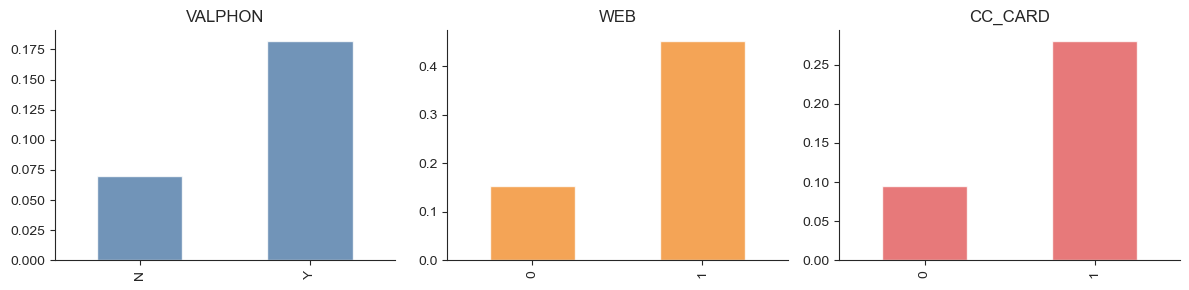

In [11]:
crosstabplots(store_data[categorical_store],store_data['RESP'])
plt.show()

(<Figure size 1200x4500 with 44 Axes>,
 array([[<Axes: title={'center': 'ZIP_CODE'}>,
         <Axes: title={'center': 'FRE'}>, <Axes: title={'center': 'MON'}>],
        [<Axes: title={'center': 'AVRG'}>,
         <Axes: title={'center': 'PC_CALC20'}>,
         <Axes: title={'center': 'PSWEATERS'}>],
        [<Axes: title={'center': 'PKNIT_TOPS'}>,
         <Axes: title={'center': 'PKNIT_DRES'}>,
         <Axes: title={'center': 'PBLOUSES'}>],
        [<Axes: title={'center': 'PJACKETS'}>,
         <Axes: title={'center': 'PCAR_PNTS'}>,
         <Axes: title={'center': 'PCAS_PNTS'}>],
        [<Axes: title={'center': 'PSHIRTS'}>,
         <Axes: title={'center': 'PDRESSES'}>,
         <Axes: title={'center': 'PSUITS'}>],
        [<Axes: title={'center': 'POUTERWEAR'}>,
         <Axes: title={'center': 'PJEWELRY'}>,
         <Axes: title={'center': 'PFASHION'}>],
        [<Axes: title={'center': 'PLEGWEAR'}>,
         <Axes: title={'center': 'PCOLLSPND'}>,
         <Axes: title={'center

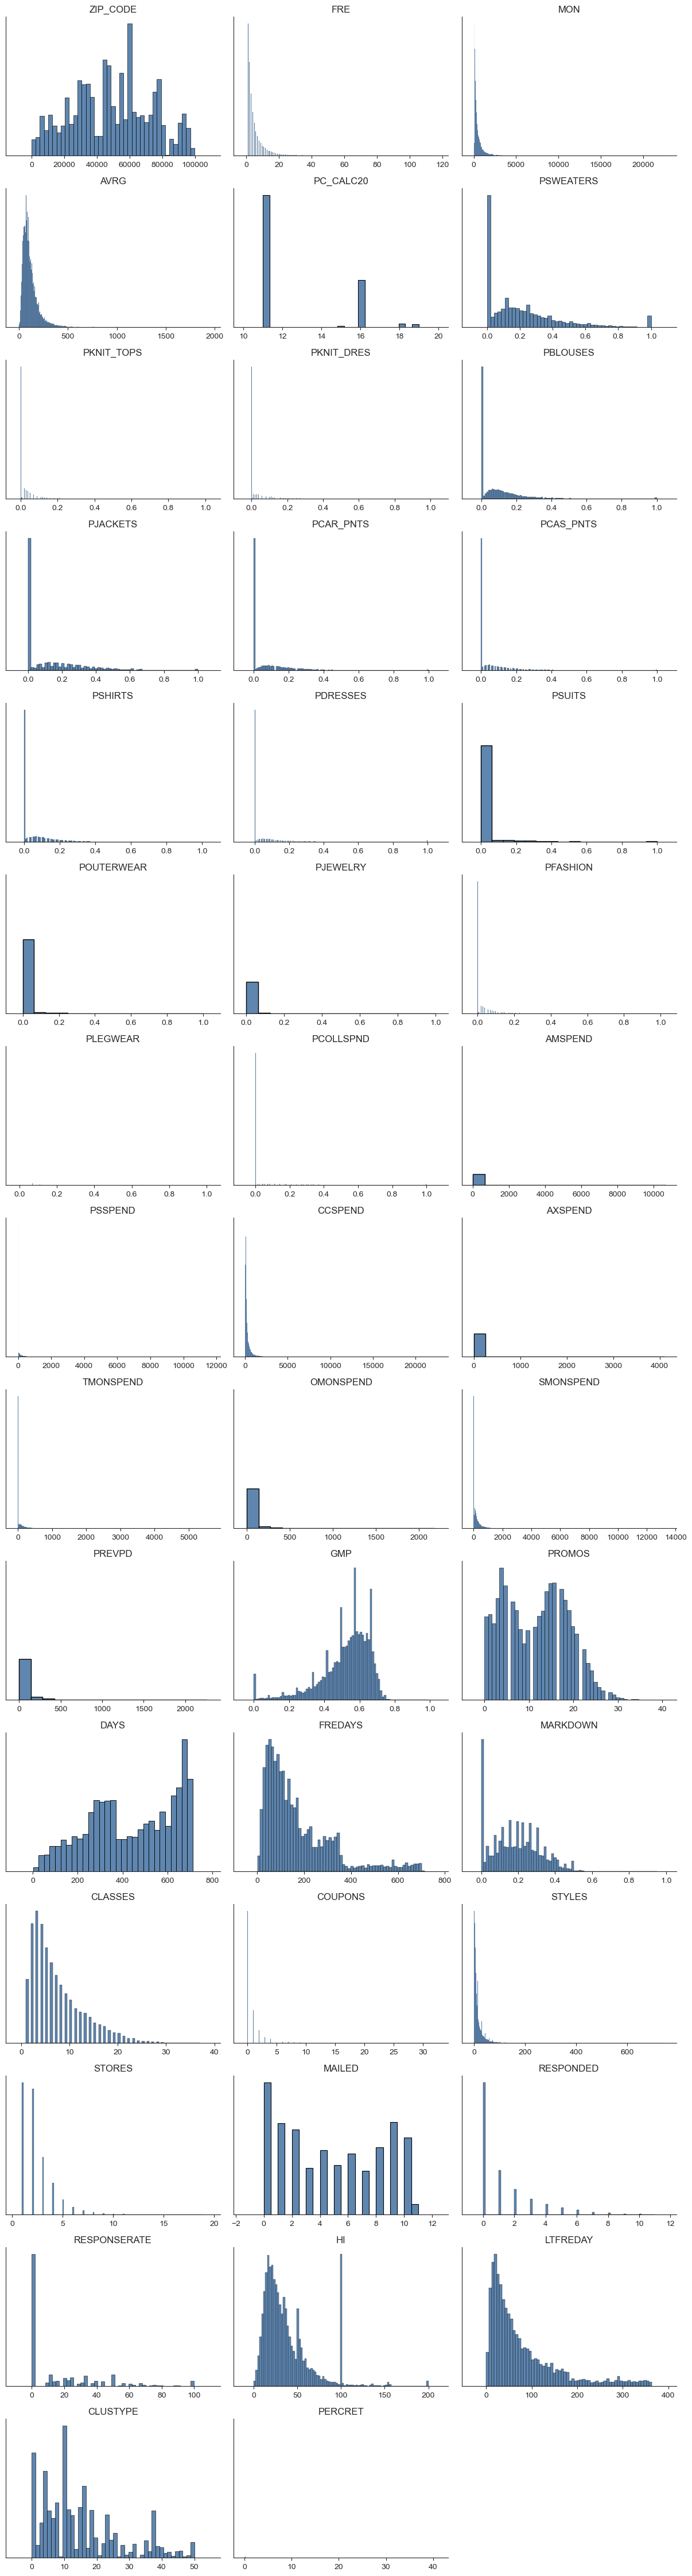

In [12]:
distplots(store_data[numerical_store])

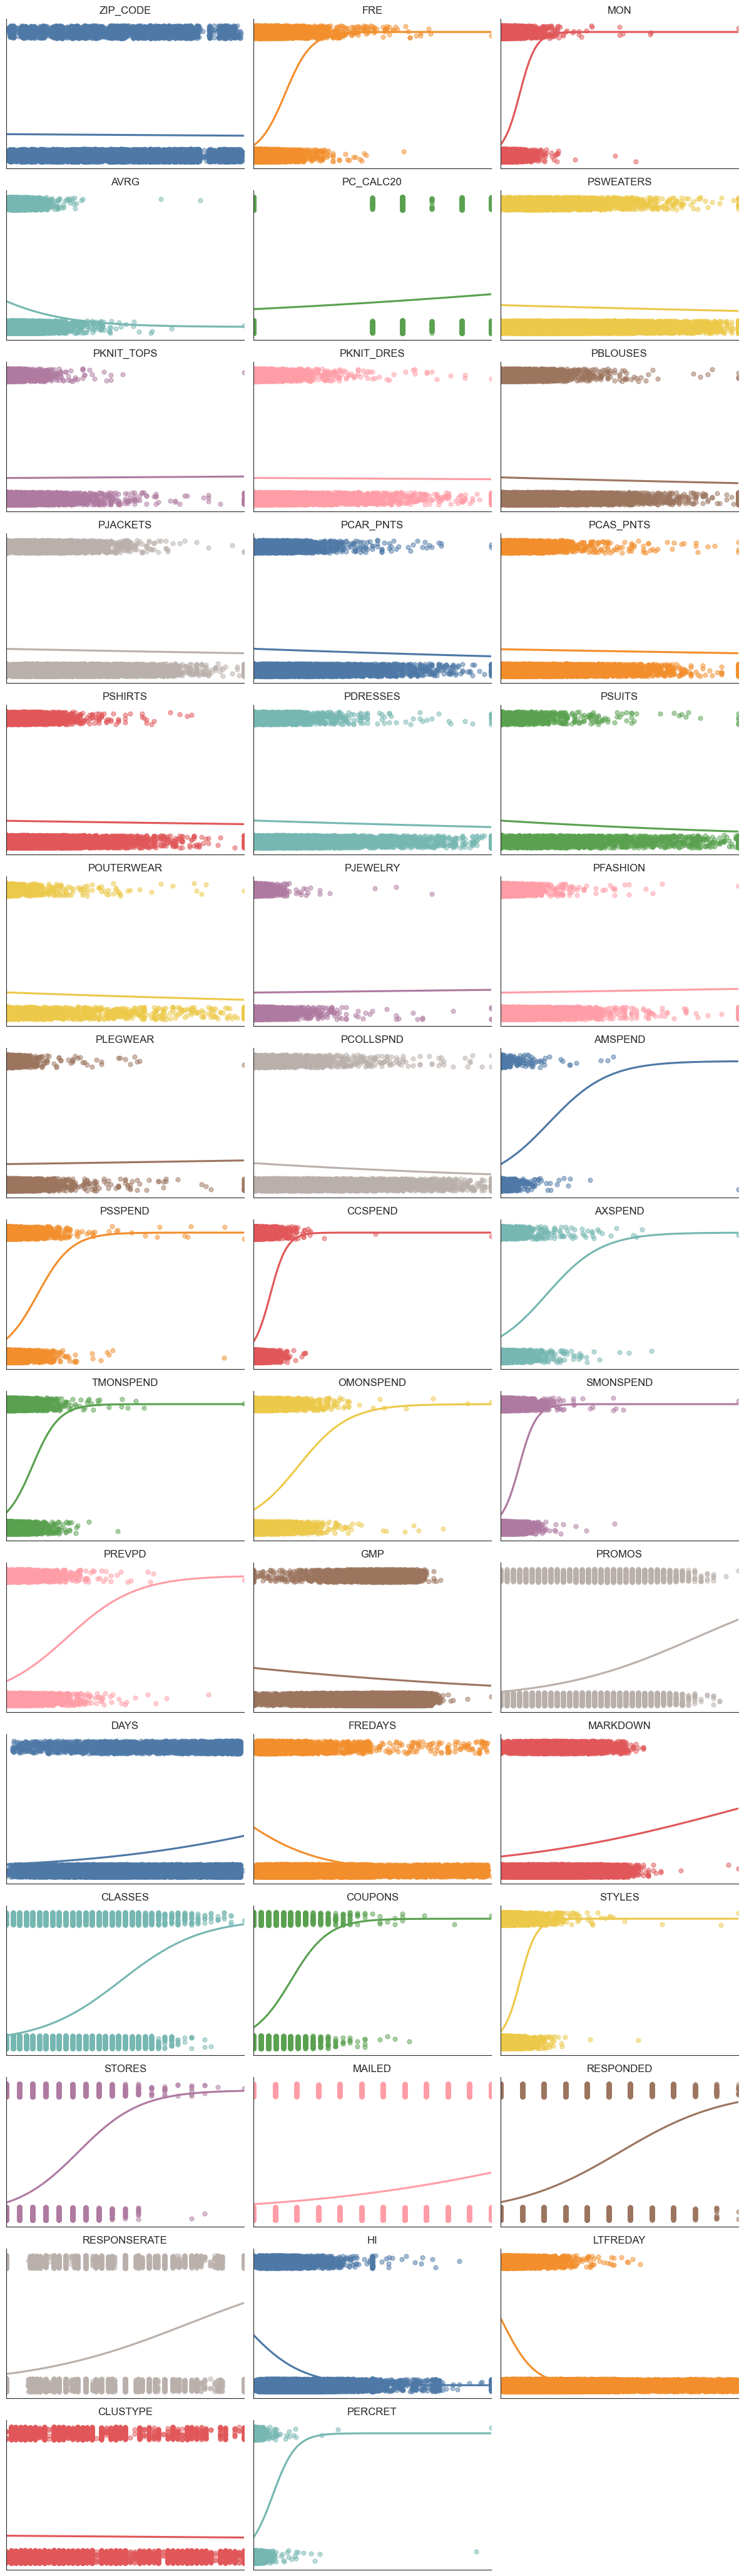

In [13]:
fig, ax = regplots(store_data[numerical_store], store_data['RESP'])
plt.show()

Standardize, one-hot and tran_test split for bank dataset

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [15]:
# Convert categorical variables to numerical using one-hot encoding for the bank dataset
bank_data_processed = pd.get_dummies(bank_data, drop_first=True)

# Standardize numerical features for the bank dataset
scaler = StandardScaler()
numerical_features = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
bank_data_processed[numerical_features] = scaler.fit_transform(bank_data_processed[numerical_features])

# For the store dataset, convert categorical variables and standardize numerical features
store_data_processed = store_data.copy()
store_data_processed = pd.get_dummies(store_data_processed, drop_first=True)

# Standardize numerical features for the store dataset
store_numerical_features = store_data_processed.select_dtypes(include=['float64', 'int64']).columns
store_data_processed[store_numerical_features] = scaler.fit_transform(store_data_processed[store_numerical_features])

In [16]:
# Define features and target for bank dataset
X_bank = bank_data_processed.drop(columns=['y_yes'])
y_bank = bank_data_processed['y_yes']

# Split the bank dataset
X_bank_train, X_bank_test, y_bank_train, y_bank_test = train_test_split(X_bank, y_bank, test_size=0.2, random_state=42)

Standardize, one-hot and tran_test split for store dataset

In [17]:
#One-hot encoding
store_data_processed = pd.get_dummies(store_data, drop_first=True)

#Standardize
scaler = StandardScaler()
numeric_columns = store_data_processed.select_dtypes(include=['float64', 'int64']).columns
store_data_processed[numeric_columns] = scaler.fit_transform(store_data_processed[numeric_columns])

y_store = store_data_processed['RESP'].astype(int)
X_store = store_data_processed.drop(columns=['RESP'])

#ensure all labels are either 0 or 1
class_mapping = {0: 0, 2: 1}
y_store = y_store.map(class_mapping)

X_store_train, X_store_test, y_store_train, y_store_test = train_test_split(X_store, y_store, test_size=0.2, random_state=42)

### Stacking of XGBoost and Random Forest

In [18]:
from xgboost import XGBRFRegressor
estimators = [
    ('XGBRFRegressor', XGBRFRegressor(n_estimators=67,
                                      max_depth=10,
                                      learning_rate=0.28630833589751936,
                                      subsample=0.8510087448295217,
                                      colsample_bytree=0.6942923086810117,
                                      random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=60,
                                             max_depth=7,
                                             min_samples_split=7,
                                             min_samples_leaf=7,
                                             random_state=42))
]


stack_bank = StackingClassifier(estimators=estimators, cv=5, final_estimator=LogisticRegression(penalty=None))


stack_bank.fit(X_bank_train, y_bank_train)

StackingClassifier(cv=5,
                   estimators=[('XGBRFRegressor',
                                XGBRFRegressor(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bytree=0.6942923086810117,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,...
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=67, n_jobs=None,
                                               num_parallel_tree=None,
                                               objective='reg:squarederror',
                                               random_state=42, ...)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=7,
                                                       min_samples_leaf=7,
                                                       min_samples_split=7,
                                                       n_estimators=60,
                                                       random_state=42))],
                   final_estimator=LogisticRegression(penalty=None))

Prediction with Bank dataset

Accuracy: 0.8971
F1-Score: 0.3477
Precision: 0.6192
Recall: 0.2417
ROC AUC: 0.7917
Model Stack Confusion Matrix:
 [[7164  139]
 [ 709  226]]


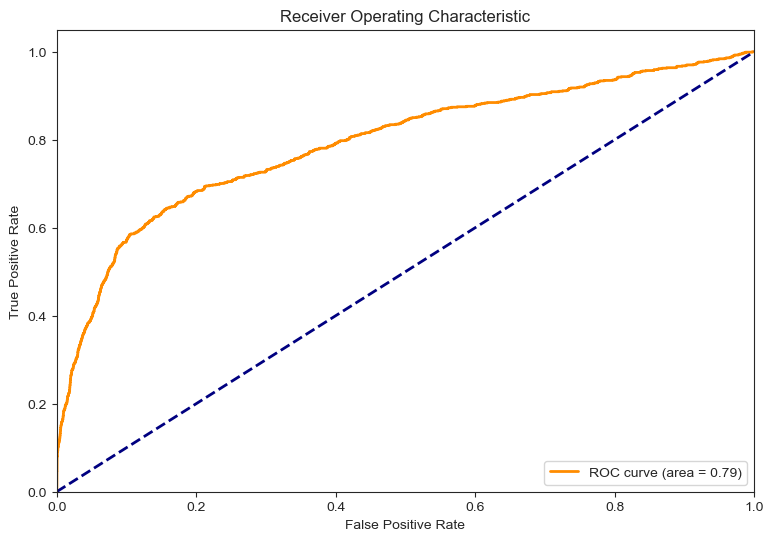

In [20]:
stack_y_bank_prob = stack_bank.predict_proba(X_bank_test)

stack_y_bank_pred = (stack_y_bank_prob[:, 1] > 0.5).astype(int)

sb_accuracy = accuracy_score(y_bank_test, stack_y_bank_pred)
sb_f1 = f1_score(y_bank_test, stack_y_bank_pred)
sb_precision = precision_score(y_bank_test, stack_y_bank_pred)
sb_recall = recall_score(y_bank_test, stack_y_bank_pred)
sb_roc_auc = roc_auc_score(y_bank_test, stack_y_bank_prob[:, 1])
sbtn, sbfp, sbfn, sbtp = confusion_matrix(y_bank_test, stack_y_bank_pred).ravel()

print(f"Accuracy: {round(sb_accuracy, 4)}")
print(f"F1-Score: {round(sb_f1, 4)}")
print(f"Precision: {round(sb_precision, 4)}")
print(f"Recall: {round(sb_recall, 4)}")
print(f"ROC AUC: {round(sb_roc_auc, 4)}")
print("Model Stack Confusion Matrix:\n", confusion_matrix(y_bank_test, stack_y_bank_pred))

# false_positive_rate, true_positive_rate, roc_thresholds = roc_curve(y_test, pred_probs)
sb_fpr, sb_tpr, sb_tau = roc_curve(y_bank_test, stack_y_bank_prob[:,1])
plt.figure()
plt.plot(sb_fpr, sb_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % sb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Calculate the threshold

In [21]:
optimal_idx = np.argmax(sb_tpr - sb_fpr)
optimal_threshold = sb_tau[optimal_idx]

print("Optimal threshold: ", optimal_threshold.round(4))

Optimal threshold:  0.0746


Model with threshold

Accuracy: 0.8227
F1-Score: 0.4501
Precision: 0.3473
Recall: 0.6396
ROC AUC: 0.7917
Model Stack Confusion Matrix:
 [[6179 1124]
 [ 337  598]]


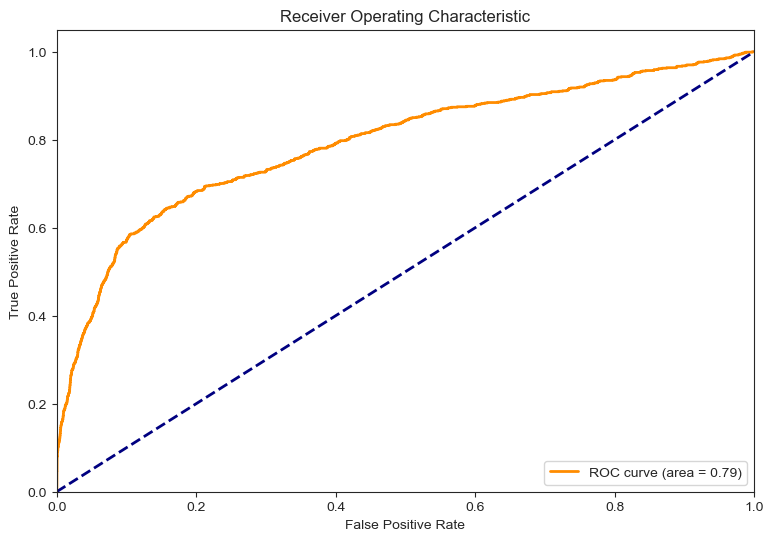

In [23]:
stack_y_bank_prob = stack_bank.predict_proba(X_bank_test)

stack_y_bank_pred = (stack_y_bank_prob[:, 1] > optimal_threshold).astype(int)

sb_accuracy = accuracy_score(y_bank_test, stack_y_bank_pred)
sb_f1 = f1_score(y_bank_test, stack_y_bank_pred)
sb_precision = precision_score(y_bank_test, stack_y_bank_pred)
sb_recall = recall_score(y_bank_test, stack_y_bank_pred)
sb_roc_auc = roc_auc_score(y_bank_test, stack_y_bank_prob[:, 1])
sbtn, sbfp, sbfn, sbtp = confusion_matrix(y_bank_test, stack_y_bank_pred).ravel()

print(f"Accuracy: {round(sb_accuracy, 4)}")
print(f"F1-Score: {round(sb_f1, 4)}")
print(f"Precision: {round(sb_precision, 4)}")
print(f"Recall: {round(sb_recall, 4)}")
print(f"ROC AUC: {round(sb_roc_auc, 4)}")
print("Model Stack Confusion Matrix:\n", confusion_matrix(y_bank_test, stack_y_bank_pred))

# false_positive_rate, true_positive_rate, roc_thresholds = roc_curve(y_test, pred_probs)
sb_fpr, sb_tpr, sb_tau = roc_curve(y_bank_test, stack_y_bank_prob[:,1])
plt.figure()
plt.plot(sb_fpr, sb_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % sb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Prediction with store dataset

In [24]:
estimators_store = [
    ('XGBRFRegressor', XGBRFRegressor(n_estimators=475,
                                      max_depth=14,
                                      learning_rate=0.24861788764289372,
                                      subsample=0.9143444107933875,
                                      colsample_bytree=0.8493784755266108,
                                      random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=359,
                                             max_depth=11,
                                             min_samples_split=4,
                                             min_samples_leaf=10,
                                             random_state=42))
]


stack_store = StackingClassifier(estimators=estimators_store, cv=5, final_estimator=LogisticRegression(penalty=None))


stack_store.fit(X_store_train, y_store_train)

StackingClassifier(cv=5,
                   estimators=[('XGBRFRegressor',
                                XGBRFRegressor(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bytree=0.8493784755266108,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,...
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=475, n_jobs=None,
                                               num_parallel_tree=None,
                                               objective='reg:squarederror',
                                               random_state=42, ...)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=11,
                                                       min_samples_leaf=10,
                                                       min_samples_split=4,
                                                       n_estimators=359,
                                                       random_state=42))],
                   final_estimator=LogisticRegression(penalty=None))

Accuracy: 0.8227
F1-Score: 0.4501
Precision: 0.3473
Recall: 0.6396
ROC AUC: 0.7917
Model Stack Confusion Matrix:
 [[3469  123]
 [ 518  238]]


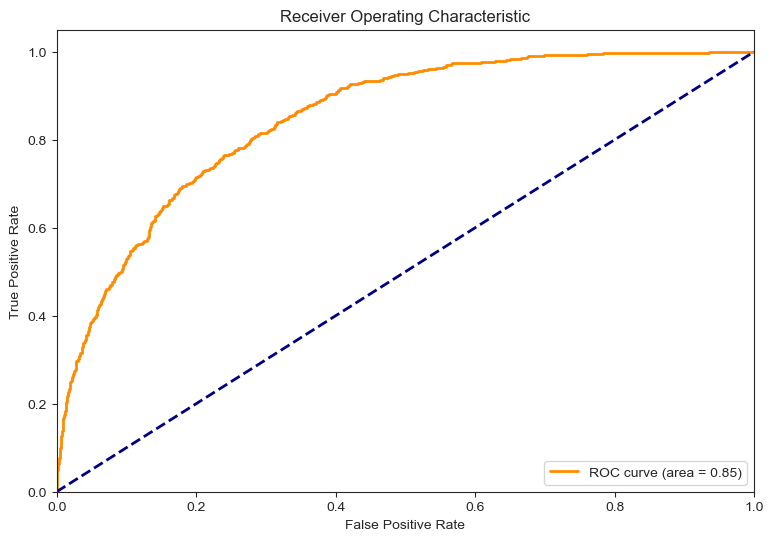

In [26]:
# plt.show()
stack_y_store_prob = stack_store.predict_proba(X_store_test)

stack_y_store_pred = (stack_y_store_prob[:, 1] > 0.5).astype(int)

ss_accuracy = accuracy_score(y_store_test, stack_y_store_pred)
ss_f1 = f1_score(y_store_test, stack_y_store_pred)
ss_precision = precision_score(y_store_test, stack_y_store_pred)
ss_recall = recall_score(y_store_test, stack_y_store_pred)
ss_roc_auc = roc_auc_score(y_store_test, stack_y_store_prob[:, 1])
sstn, ssfp, ssfn, sstp = confusion_matrix(y_store_test, stack_y_store_pred).ravel()

print(f"Accuracy: {round(sb_accuracy, 4)}")
print(f"F1-Score: {round(sb_f1, 4)}")
print(f"Precision: {round(sb_precision, 4)}")
print(f"Recall: {round(sb_recall, 4)}")
print(f"ROC AUC: {round(sb_roc_auc, 4)}")
print("Model Stack Confusion Matrix:\n", confusion_matrix(y_store_test, stack_y_store_pred))

# false_positive_rate, true_positive_rate, roc_thresholds = roc_curve(y_test, pred_probs)
ss_fpr, ss_tpr, ss_tau = roc_curve(y_store_test, stack_y_store_prob[:,1])
plt.figure()
plt.plot(ss_fpr, ss_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % ss_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Threshold

In [27]:
store_optimal_idx = np.argmax(ss_tpr - ss_fpr)
s_optimal_threshold = ss_tau[store_optimal_idx]

print("Optimal threshold: ", s_optimal_threshold.round(4))

Optimal threshold:  0.1452


Accuracy: 0.8702
F1-Score: 0.4926
Precision: 0.4428
Recall: 0.5551
ROC AUC: 0.7917
Model Stack Confusion Matrix:
 [[6650  653]
 [ 416  519]]


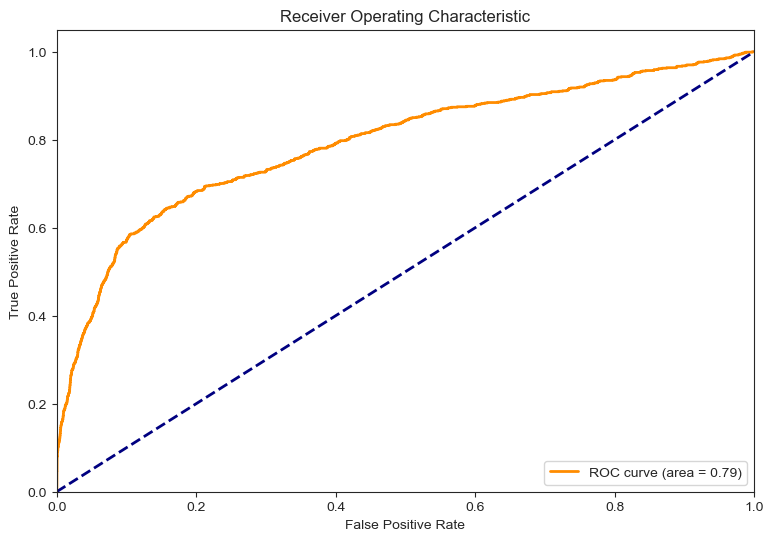

In [29]:
stack_y_bank_prob = stack_bank.predict_proba(X_bank_test)

stack_y_bank_pred = (stack_y_bank_prob[:, 1] > s_optimal_threshold).astype(int)

sb_accuracy = accuracy_score(y_bank_test, stack_y_bank_pred)
sb_f1 = f1_score(y_bank_test, stack_y_bank_pred)
sb_precision = precision_score(y_bank_test, stack_y_bank_pred)
sb_recall = recall_score(y_bank_test, stack_y_bank_pred)
sb_roc_auc = roc_auc_score(y_bank_test, stack_y_bank_prob[:, 1])
sbtn, sbfp, sbfn, sbtp = confusion_matrix(y_bank_test, stack_y_bank_pred).ravel()

print(f"Accuracy: {round(sb_accuracy, 4)}")
print(f"F1-Score: {round(sb_f1, 4)}")
print(f"Precision: {round(sb_precision, 4)}")
print(f"Recall: {round(sb_recall, 4)}")
print(f"ROC AUC: {round(sb_roc_auc, 4)}")
print("Model Stack Confusion Matrix:\n", confusion_matrix(y_bank_test, stack_y_bank_pred))

# false_positive_rate, true_positive_rate, roc_thresholds = roc_curve(y_test, pred_probs)
sb_fpr, sb_tpr, sb_tau = roc_curve(y_bank_test, stack_y_bank_prob[:,1])
plt.figure()
plt.plot(sb_fpr, sb_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % sb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Decision Tree
Bank dataset

In [30]:
tree_clf = DecisionTreeClassifier(criterion='entropy')
tree_clf.fit(X_bank_train, y_bank_train)

DecisionTreeClassifier(criterion='entropy')

ROC AUC Score: 0.6342215967212946
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7303
           1       0.32      0.36      0.34       935

    accuracy                           0.84      8238
   macro avg       0.62      0.63      0.62      8238
weighted avg       0.85      0.84      0.84      8238

Decision Tree confusion matrix: 
 [[6576  727]
 [ 596  339]]


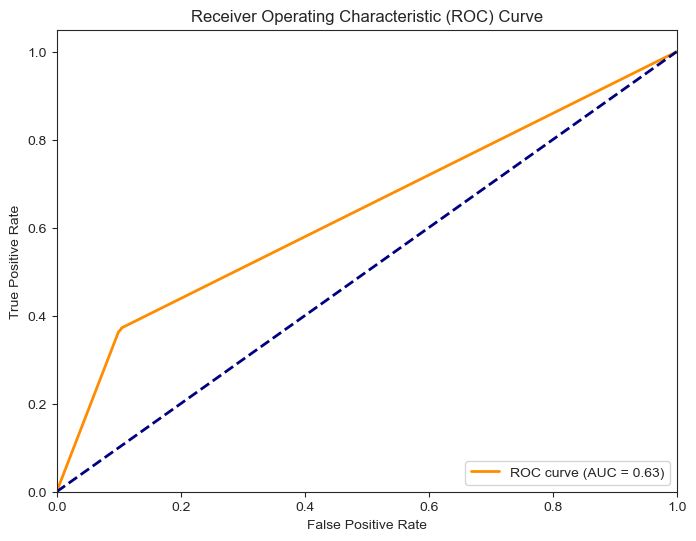

In [31]:
tree_clf_pred = tree_clf.predict(X_bank_test)

tree_clf_report = classification_report(y_bank_test, tree_clf_pred)
tree_clf_cm = confusion_matrix(y_bank_test, tree_clf_pred)

y_true = y_bank_test
y_pred_proba = tree_clf.predict_proba(X_bank_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_bank_test, y_pred_proba)
roc_auc = roc_auc_score(y_true, y_pred_proba)
print("ROC AUC Score:", roc_auc)
print(tree_clf_report)
print("Decision Tree confusion matrix: \n", tree_clf_cm)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Optimal Threshold: 0.25
Confusion Matrix (Optimal Threshold):
[[6539  764]
 [ 587  348]]

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7303
           1       0.31      0.37      0.34       935

    accuracy                           0.84      8238
   macro avg       0.62      0.63      0.62      8238
weighted avg       0.85      0.84      0.84      8238



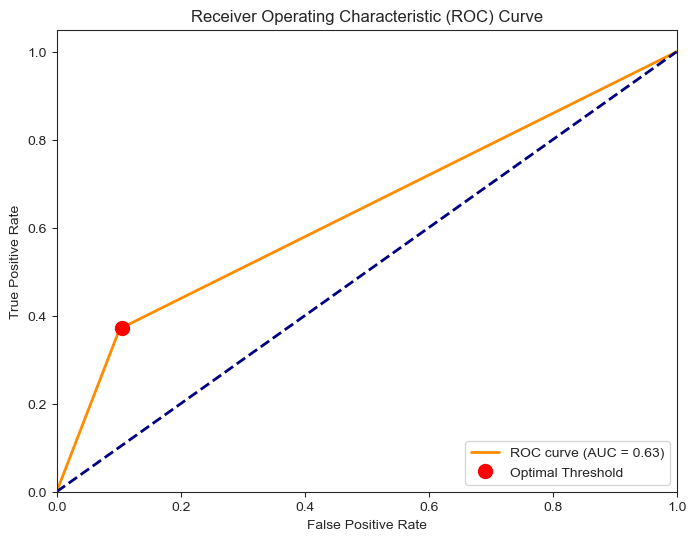

In [32]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

# Make predictions using the optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate confusion matrix and classification report using the optimal threshold
cm_optimal = confusion_matrix(y_true, y_pred_optimal)
report_optimal = classification_report(y_true, y_pred_optimal)

print("Confusion Matrix (Optimal Threshold):")
print(cm_optimal)
print("\nClassification Report (Optimal Threshold):")
print(report_optimal)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot the optimal threshold point on the ROC curve
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=10, label='Optimal Threshold')
plt.legend(loc="lower right")

plt.show()

In [33]:
tree_clf = DecisionTreeClassifier(criterion='entropy')
path = tree_clf.cost_complexity_pruning_path(X_bank_train, y_bank_train)
alphas = path.ccp_alphas

Random search tuning

In [36]:
search_space = {'ccp_alpha': alphas,}
tree_search = RandomizedSearchCV(tree_clf, search_space, cv = 5 , scoring='neg_log_loss',random_state=42)
tree_search.fit(X_bank_train, y_bank_train)
tree = tree_search.best_estimator_
print('Best parameters found by random search:', tree_search.best_params_, '\n')

Best parameters found by random search: {'ccp_alpha': 0.00011959283816808514} 



ROC AUC Score: 0.7287198653252893
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7303
           1       0.51      0.29      0.37       935

    accuracy                           0.89      8238
   macro avg       0.71      0.63      0.65      8238
weighted avg       0.87      0.89      0.87      8238

Decision Tree confusion matrix: 
 [[7045  258]
 [ 664  271]]


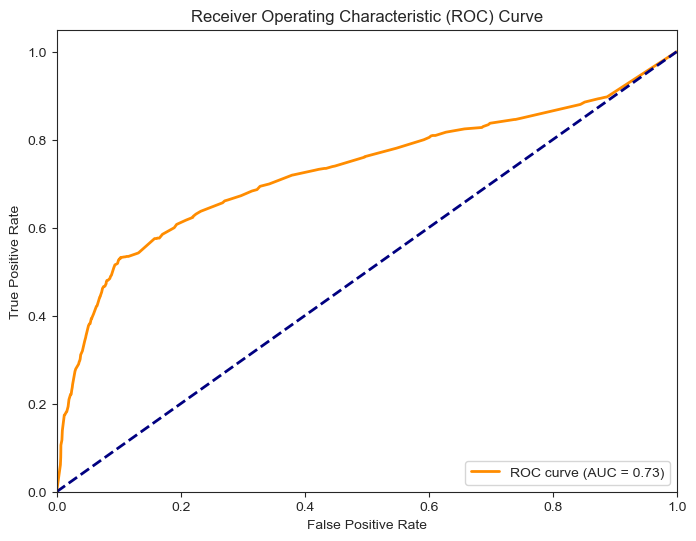

In [38]:
tree.fit(X_bank_train, y_bank_train)
tree_pred = tree.predict(X_bank_test)
tree_report = classification_report(y_bank_test, tree_pred)
tree_cm = confusion_matrix(y_bank_test, tree_pred)
y_true = y_bank_test
y_pred_proba = tree.predict_proba(X_bank_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_bank_test, y_pred_proba)
roc_auc = roc_auc_score(y_true, y_pred_proba)
print("ROC AUC Score:", roc_auc)
print(tree_report)
print("Decision Tree confusion matrix: \n", tree_cm)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Optimal Threshold: 0.15
Confusion Matrix (Optimal Threshold):
[[6548  755]
 [ 437  498]]

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7303
           1       0.40      0.53      0.46       935

    accuracy                           0.86      8238
   macro avg       0.67      0.71      0.69      8238
weighted avg       0.88      0.86      0.86      8238



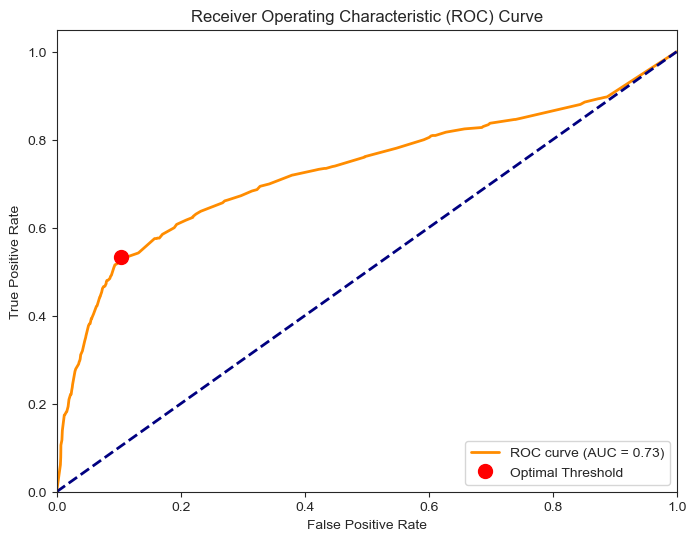

In [39]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

# Make predictions using the optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate confusion matrix and classification report using the optimal threshold
cm_optimal = confusion_matrix(y_true, y_pred_optimal)
report_optimal = classification_report(y_true, y_pred_optimal)

print("Confusion Matrix (Optimal Threshold):")
print(cm_optimal)
print("\nClassification Report (Optimal Threshold):")
print(report_optimal)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot the optimal threshold point on the ROC curve
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=10, label='Optimal Threshold')
plt.legend(loc="lower right")

plt.show()

Store dataset

In [40]:
tree_clf = DecisionTreeClassifier(criterion='entropy')
tree_clf.fit(X_store_train, y_store_train)

DecisionTreeClassifier(criterion='entropy')

ROC AUC Score: 0.628533719847751
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3592
           1       0.39      0.39      0.39       756

    accuracy                           0.79      4348
   macro avg       0.63      0.63      0.63      4348
weighted avg       0.79      0.79      0.79      4348

Decision Tree confusion matrix: 
 [[3128  464]
 [ 464  292]]


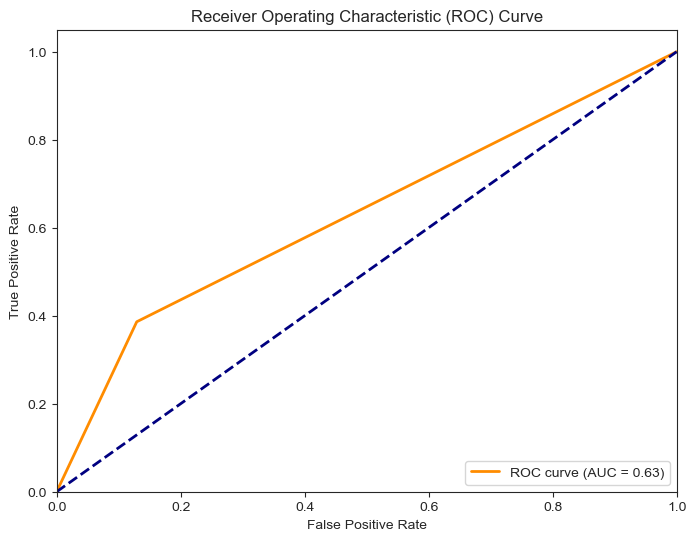

In [41]:
tree_clf_pred = tree_clf.predict(X_store_test)

tree_clf_report = classification_report(y_store_test, tree_clf_pred)
tree_clf_cm = confusion_matrix(y_store_test, tree_clf_pred)

y_true = y_store_test
y_pred_proba = tree_clf.predict_proba(X_store_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_store_test, y_pred_proba)
roc_auc = roc_auc_score(y_true, y_pred_proba)
print("ROC AUC Score:", roc_auc)
print(tree_clf_report)
print("Decision Tree confusion matrix: \n", tree_clf_cm)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Optimal Threshold: 1.0
Confusion Matrix (Optimal Threshold):
[[3128  464]
 [ 464  292]]

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3592
           1       0.39      0.39      0.39       756

    accuracy                           0.79      4348
   macro avg       0.63      0.63      0.63      4348
weighted avg       0.79      0.79      0.79      4348



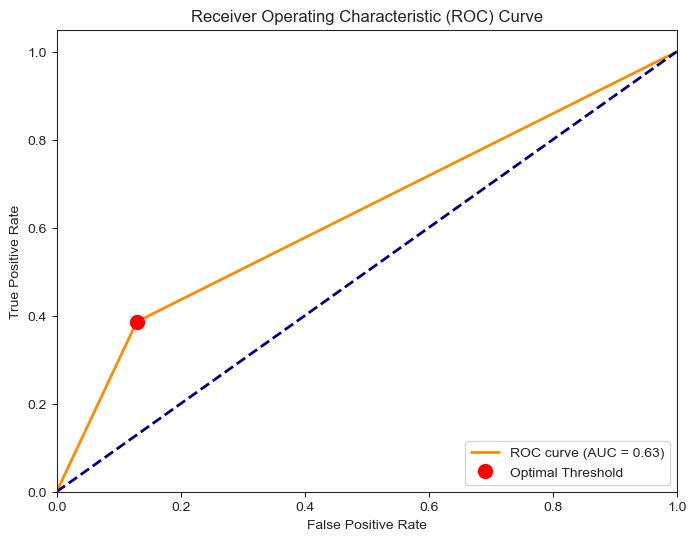

In [42]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

# Make predictions using the optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate confusion matrix and classification report using the optimal threshold
cm_optimal = confusion_matrix(y_true, y_pred_optimal)
report_optimal = classification_report(y_true, y_pred_optimal)

print("Confusion Matrix (Optimal Threshold):")
print(cm_optimal)
print("\nClassification Report (Optimal Threshold):")
print(report_optimal)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot the optimal threshold point on the ROC curve
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=10, label='Optimal Threshold')
plt.legend(loc="lower right")

plt.show()

In [43]:
tree_clf = DecisionTreeClassifier(criterion='entropy')
path = tree_clf.cost_complexity_pruning_path(X_store_train, y_store_train)
alphas = path.ccp_alphas

Random search tuning

In [44]:
search_space = {'ccp_alpha': alphas,}
tree_search = RandomizedSearchCV(tree_clf, search_space, cv = 5 , scoring='neg_log_loss',random_state=42)
tree_search.fit(X_store_train, y_store_train)
tree = tree_search.best_estimator_
print('Best parameters found by random search:', tree_search.best_params_, '\n')

Best parameters found by random search: {'ccp_alpha': 0.004954164487405821} 



ROC AUC Score: 0.8294188437562602
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3592
           1       0.66      0.31      0.42       756

    accuracy                           0.85      4348
   macro avg       0.77      0.64      0.67      4348
weighted avg       0.83      0.85      0.83      4348

Decision Tree confusion matrix: 
 [[3472  120]
 [ 522  234]]


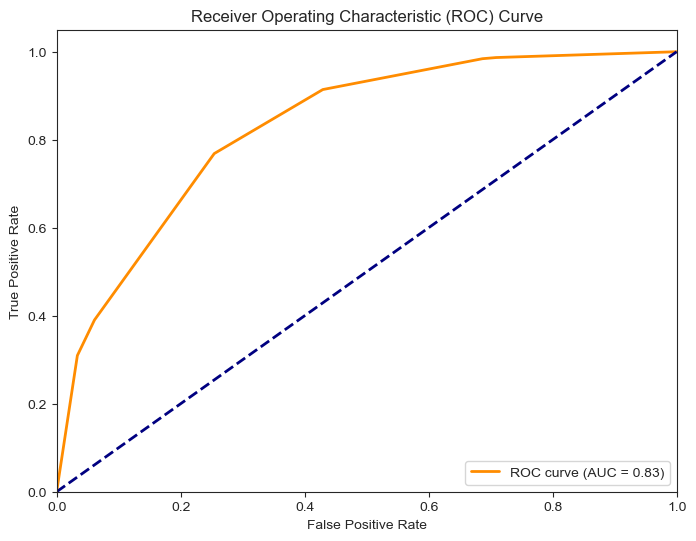

In [45]:
tree_pred = tree.predict(X_store_test)

tree_report = classification_report(y_store_test, tree_pred)
tree_cm = confusion_matrix(y_store_test, tree_pred)

y_true = y_store_test
y_pred_proba = tree.predict_proba(X_store_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_store_test, y_pred_proba)
roc_auc = roc_auc_score(y_true, y_pred_proba)
print("ROC AUC Score:", roc_auc)
print(tree_report)
print("Decision Tree confusion matrix: \n", tree_cm)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Optimal Threshold: 0.285753052917232
Confusion Matrix (Optimal Threshold):
[[2679  913]
 [ 175  581]]

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

           0       0.94      0.75      0.83      3592
           1       0.39      0.77      0.52       756

    accuracy                           0.75      4348
   macro avg       0.66      0.76      0.67      4348
weighted avg       0.84      0.75      0.78      4348



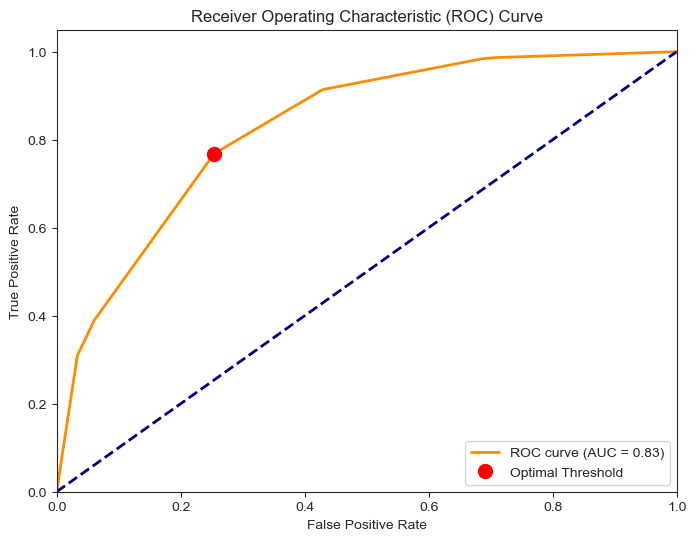

In [46]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

# Make predictions using the optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate confusion matrix and classification report using the optimal threshold
cm_optimal = confusion_matrix(y_true, y_pred_optimal)
report_optimal = classification_report(y_true, y_pred_optimal)

print("Confusion Matrix (Optimal Threshold):")
print(cm_optimal)
print("\nClassification Report (Optimal Threshold):")
print(report_optimal)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot the optimal threshold point on the ROC curve
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=10, label='Optimal Threshold')
plt.legend(loc="lower right")

plt.show()

### XGBoost
Bank dataset

ROC AUC Score: 0.7758117131557538
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.60      0.29      0.39       935

    accuracy                           0.90      8238
   macro avg       0.76      0.63      0.67      8238
weighted avg       0.88      0.90      0.88      8238

XGBOOST COnfusion matrix: 
 [[7123  180]
 [ 666  269]]


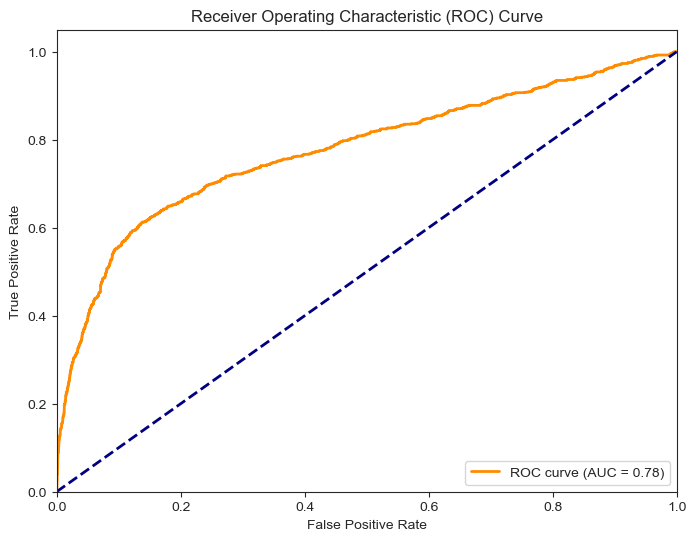

In [73]:
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_bank_train, y_bank_train)
xgb_clf_pred = xgb_clf.predict(X_bank_test)
xgb_clf_report = classification_report(y_bank_test, xgb_clf_pred)
xgb_clf_cm = confusion_matrix(y_bank_test, xgb_clf_pred)

y_true = y_bank_test
y_pred_proba = xgb_clf.predict_proba(X_bank_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_bank_test, y_pred_proba)
roc_auc = roc_auc_score(y_true, y_pred_proba)
print("ROC AUC Score:", roc_auc)
print(xgb_clf_report)
print("XGBOOST COnfusion matrix: \n", xgb_clf_cm)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Calculate threshold

Optimal Threshold: 0.12412561
Confusion Matrix (Optimal Threshold):
[[6295 1008]
 [ 362  573]]

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7303
           1       0.36      0.61      0.46       935

    accuracy                           0.83      8238
   macro avg       0.65      0.74      0.68      8238
weighted avg       0.88      0.83      0.85      8238



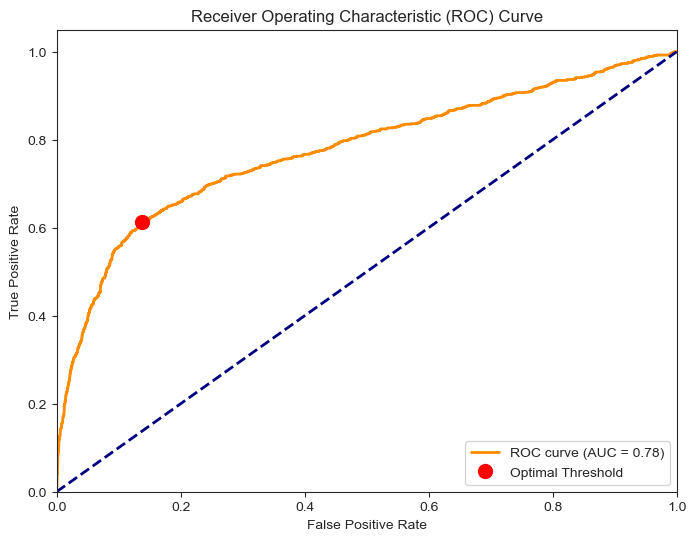

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
# Calculate the optimal threshold based on Youden's J statistic
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

# Make predictions using the optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate confusion matrix and classification report using the optimal threshold
cm_optimal = confusion_matrix(y_true, y_pred_optimal)
report_optimal = classification_report(y_true, y_pred_optimal)

print("Confusion Matrix (Optimal Threshold):")
print(cm_optimal)
print("\nClassification Report (Optimal Threshold):")
print(report_optimal)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot the optimal threshold point on the ROC curve
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=10, label='Optimal Threshold')
plt.legend(loc="lower right")

plt.show()

Tuning with Optuna

[I 2024-05-24 18:56:19,726] A new study created in memory with name: no-name-67784fc7-9bac-400f-89ab-d3dd44ed7499
[I 2024-05-24 18:56:20,582] Trial 0 finished with value: 0.8865015780529255 and parameters: {'n_estimators': 361, 'max_depth': 7, 'learning_rate': 0.18387593318923418, 'subsample': 0.852965036478213, 'colsample_bytree': 0.5649373529129894}. Best is trial 0 with value: 0.8865015780529255.
[I 2024-05-24 18:56:21,748] Trial 1 finished with value: 0.8865015780529255 and parameters: {'n_estimators': 106, 'max_depth': 14, 'learning_rate': 0.1846488094593159, 'subsample': 0.7515817723355065, 'colsample_bytree': 0.6471869175799452}. Best is trial 0 with value: 0.8865015780529255.
[I 2024-05-24 18:56:25,617] Trial 2 finished with value: 0.8865015780529255 and parameters: {'n_estimators': 240, 'max_depth': 16, 'learning_rate': 0.28467532796438055, 'subsample': 0.7951068121755968, 'colsample_bytree': 0.9297472308779093}. Best is trial 0 with value: 0.8865015780529255.
[I 2024-05-24 18


XGBRFRegressor Best Parameters:  {'n_estimators': 361, 'max_depth': 7, 'learning_rate': 0.18387593318923418, 'subsample': 0.852965036478213, 'colsample_bytree': 0.5649373529129894}
XGBRFRegressor Best Score:  0.8865015780529255
XGBRFRegressor Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      7303
           1       0.00      0.00      0.00       935

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238

XGBRFRegressor Confusion Matrix:
 [[7303    0]
 [ 935    0]]
XGBRFRegressor AUC:  0.787811616499263


c:\ProgramData\anaconda3\envs\QBUS\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\envs\QBUS\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\envs\QBUS\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


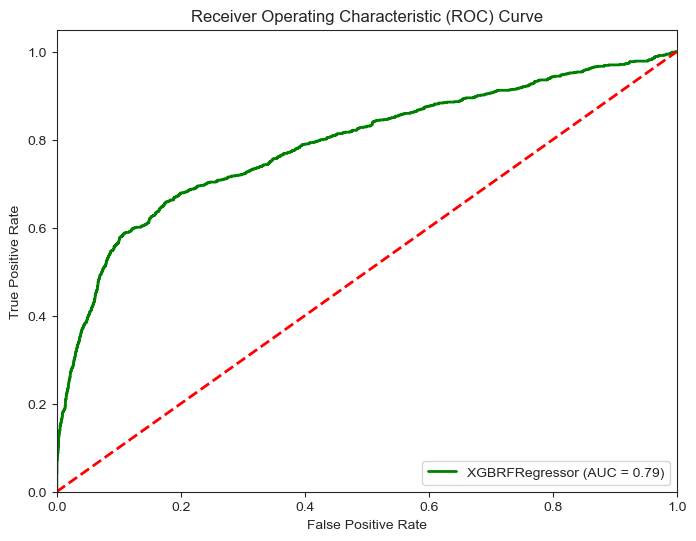

In [75]:
import optuna
from sklearn.metrics import accuracy_score
from xgboost import XGBRFRegressor
def xgb_objective(trial):
    xgb_params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 2, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
    xgb_reg = XGBRFRegressor(**xgb_params, random_state=42)
    xgb_reg.fit(X_bank_train, y_bank_train)
    xgb_pred = xgb_reg.predict(X_bank_test)
    xgb_pred_binary = (xgb_pred >= 0.5).astype(int)
    accuracy = accuracy_score(y_bank_test, xgb_pred_binary)
    return accuracy

# Perform hyperparameter tuning for XGBRFRegressor
xgb_study = optuna.create_study(direction='maximize')
xgb_study.optimize(xgb_objective, n_trials=30)

# Get the best parameters and best score for XGBRFRegressor
xgb_best_params = xgb_study.best_params
xgb_best_score = xgb_study.best_value

# Train the XGBRFRegressor with the best parameters
xgb_best_reg = XGBRFRegressor(**xgb_best_params, random_state=42)
xgb_best_reg.fit(X_bank_train, y_bank_train)
xgb_best_pred = xgb_best_reg.predict(X_bank_test)
xgb_best_pred_binary = (xgb_best_pred >= 0.5).astype(int)


# Evaluate the XGBRFRegressor
xgb_report = classification_report(y_bank_test, xgb_best_pred_binary)
xgb_cm = confusion_matrix(y_bank_test, xgb_best_pred_binary)
xgb_fpr, xgb_tpr, _ = roc_curve(y_bank_test, xgb_best_pred)
xgb_auc = roc_auc_score(y_bank_test, xgb_best_pred)

print("\nXGBRFRegressor Best Parameters: ", xgb_best_params)
print("XGBRFRegressor Best Score: ", xgb_best_score)
print("XGBRFRegressor Classification Report:\n", xgb_report)
print("XGBRFRegressor Confusion Matrix:\n", xgb_cm)
print("XGBRFRegressor AUC: ", xgb_auc)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, color='green', lw=2, label='XGBRFRegressor (AUC = %0.2f)' % xgb_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Optimal Threshold:  0.108791955
XGBRFRegressor Classification Report (Optimal threshold):
               precision    recall  f1-score   support

           0       0.95      0.82      0.88      7303
           1       0.32      0.66      0.43       935

    accuracy                           0.81      8238
   macro avg       0.64      0.74      0.66      8238
weighted avg       0.88      0.81      0.83      8238

XGBRFRegressor Confusion Matrix (Optimal threshold):
 [[6016 1287]
 [ 319  616]]


c:\ProgramData\anaconda3\envs\QBUS\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\envs\QBUS\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\envs\QBUS\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


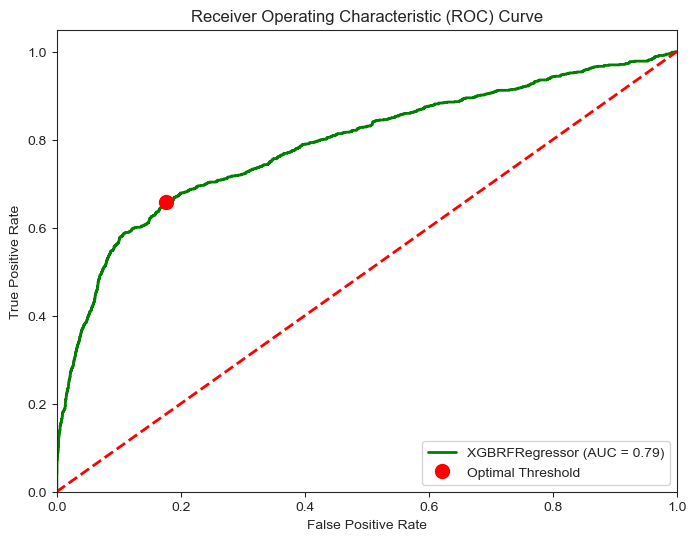

In [76]:
# Evaluate the XGBRFRegressor
xgb_best_pred_proba = xgb_best_reg.predict(X_bank_test)
xgb_report = classification_report(y_bank_test, xgb_best_pred_binary)
xgb_cm = confusion_matrix(y_bank_test, xgb_best_pred_binary)
xgb_fpr, xgb_tpr, _ = roc_curve(y_bank_test, xgb_best_pred)
xgb_auc = roc_auc_score(y_bank_test, xgb_best_pred)

# Calculate the optimal threshold using Youden's J statistic
fpr, tpr, thresholds = roc_curve(y_bank_test, xgb_best_pred_proba)
J = tpr - fpr
optimal_idx = np.argmax(J)
optimal_threshold = thresholds[optimal_idx]

# Apply the optimal threshold to get binary predictions
xgb_best_pred_binary_optimal = (xgb_best_pred_proba >= optimal_threshold).astype(int)

# Evaluate the XGBRFRegressor with the optimal threshold
xgb_report_optimal = classification_report(y_bank_test, xgb_best_pred_binary_optimal)
xgb_cm_optimal = confusion_matrix(y_bank_test, xgb_best_pred_binary_optimal)

print("Optimal Threshold: ", optimal_threshold)
print("XGBRFRegressor Classification Report (Optimal threshold):\n", xgb_report_optimal)
print("XGBRFRegressor Confusion Matrix (Optimal threshold):\n", xgb_cm_optimal)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, color='green', lw=2, label='XGBRFRegressor (AUC = %0.2f)' % xgb_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot the optimal threshold point
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=10, label='Optimal Threshold')
plt.legend(loc="lower right")

plt.show()

Store Dataset

ROC AUC Score: 0.8531031628191985
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3592
           1       0.67      0.30      0.41       756

    accuracy                           0.85      4348
   macro avg       0.77      0.63      0.66      4348
weighted avg       0.83      0.85      0.83      4348

XGBRFRegressor Confusion matrix: 
 [[3480  112]
 [ 532  224]]


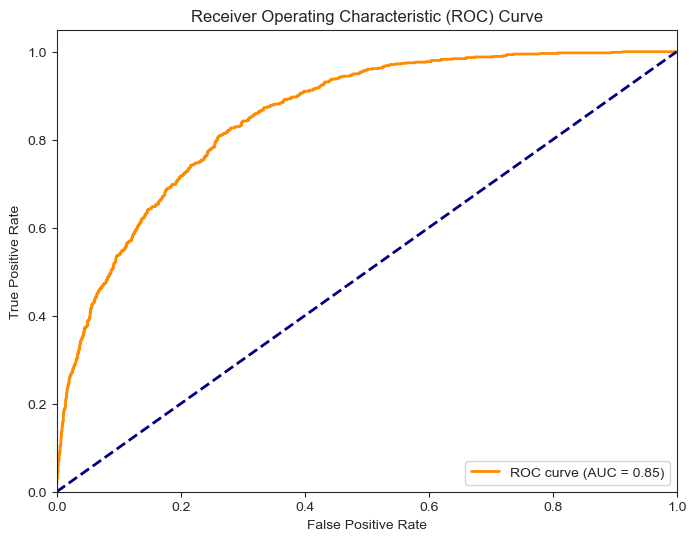

In [77]:
xgb_reg = XGBRFRegressor(n_estimators=100, subsample=0.8, colsample_bynode=0.8, random_state=42)
xgb_reg.fit(X_store_train, y_store_train)

xgb_reg_pred = xgb_reg.predict(X_store_test)
xgb_reg_pred_binary = (xgb_reg_pred >= 0.5).astype(int)

xgb_reg_report = classification_report(y_store_test, xgb_reg_pred_binary)
xgb_reg_cm = confusion_matrix(y_store_test, xgb_reg_pred_binary)

y_true = y_store_test
y_pred_proba = xgb_reg.predict(X_store_test)

fpr, tpr, thresholds = roc_curve(y_store_test, y_pred_proba)
roc_auc = roc_auc_score(y_true, y_pred_proba)

print("ROC AUC Score:", roc_auc)
print(xgb_reg_report)
print("XGBRFRegressor Confusion matrix: \n", xgb_reg_cm)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Threshold

Optimal Threshold: 0.17922516
Confusion Matrix (Optimal Threshold):
[[2653  939]
 [ 145  611]]

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      3592
           1       0.39      0.81      0.53       756

    accuracy                           0.75      4348
   macro avg       0.67      0.77      0.68      4348
weighted avg       0.85      0.75      0.78      4348



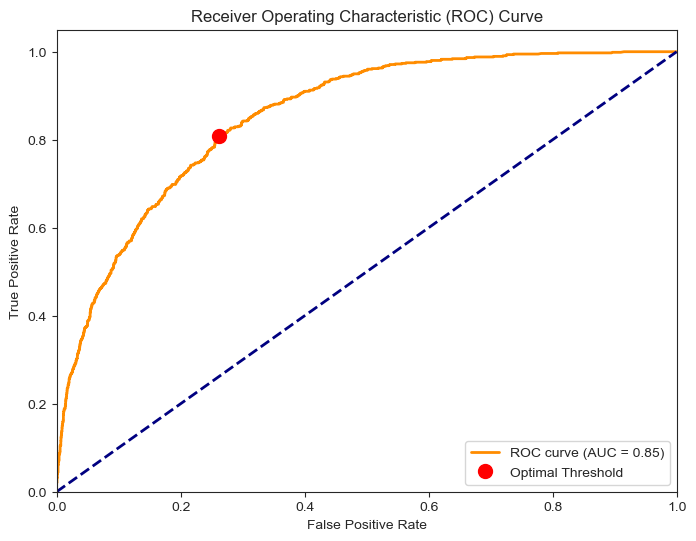

In [78]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

# Make predictions using the optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate confusion matrix and classification report using the optimal threshold
cm_optimal = confusion_matrix(y_true, y_pred_optimal)
report_optimal = classification_report(y_true, y_pred_optimal)

print("Confusion Matrix (Optimal Threshold):")
print(cm_optimal)
print("\nClassification Report (Optimal Threshold):")
print(report_optimal)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot the optimal threshold point on the ROC curve
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=10, label='Optimal Threshold')
plt.legend(loc="lower right")

plt.show()

Tuning

[I 2024-05-24 19:00:56,317] A new study created in memory with name: no-name-79626eb6-b58d-4788-9f98-693b17b250fb
[I 2024-05-24 19:01:01,680] Trial 0 finished with value: 0.8261269549218031 and parameters: {'n_estimators': 133, 'max_depth': 19, 'learning_rate': 0.16407444513719627, 'subsample': 0.8345095459164618, 'colsample_bytree': 0.9332029121372047}. Best is trial 0 with value: 0.8261269549218031.
[I 2024-05-24 19:01:02,910] Trial 1 finished with value: 0.8261269549218031 and parameters: {'n_estimators': 253, 'max_depth': 8, 'learning_rate': 0.014557395628466693, 'subsample': 0.7968859960584531, 'colsample_bytree': 0.9020792479762026}. Best is trial 0 with value: 0.8261269549218031.
[I 2024-05-24 19:01:15,557] Trial 2 finished with value: 0.8261269549218031 and parameters: {'n_estimators': 493, 'max_depth': 17, 'learning_rate': 0.23140989249451152, 'subsample': 0.6494710091579219, 'colsample_bytree': 0.8282455821227773}. Best is trial 0 with value: 0.8261269549218031.
[I 2024-05-24


XGBRFRegressor Best Parameters:  {'n_estimators': 133, 'max_depth': 19, 'learning_rate': 0.16407444513719627, 'subsample': 0.8345095459164618, 'colsample_bytree': 0.9332029121372047}
XGBRFRegressor Best Score:  0.8261269549218031
XGBRFRegressor Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.90      3592
           1       0.00      0.00      0.00       756

    accuracy                           0.83      4348
   macro avg       0.41      0.50      0.45      4348
weighted avg       0.68      0.83      0.75      4348

XGBRFRegressor Confusion Matrix:
 [[3592    0]
 [ 756    0]]
XGBRFRegressor AUC:  0.8422714792425261


c:\ProgramData\anaconda3\envs\QBUS\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\envs\QBUS\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\envs\QBUS\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


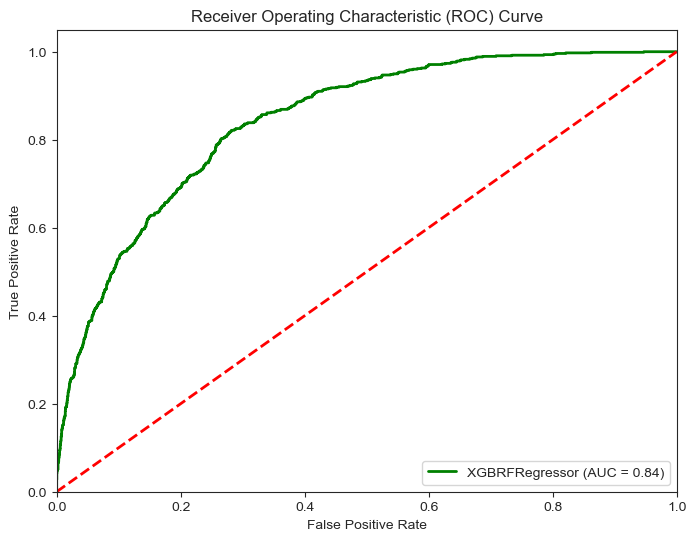

In [82]:
def xgb_objective(trial):
    xgb_params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 2, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
    xgb_reg = XGBRFRegressor(**xgb_params, random_state=42)
    xgb_reg.fit(X_store_train, y_store_train)
    xgb_pred = xgb_reg.predict(X_store_test)
    xgb_pred_binary = (xgb_pred >= 0.5).astype(int)
    accuracy = accuracy_score(y_store_test, xgb_pred_binary)
    return accuracy

# Perform hyperparameter tuning for XGBRFRegressor
xgb_study = optuna.create_study(direction='maximize')
xgb_study.optimize(xgb_objective, n_trials=10)

# Get the best parameters and best score for XGBRFRegressor
xgb_best_params = xgb_study.best_params
xgb_best_score = xgb_study.best_value

# Train the XGBRFRegressor with the best parameters
xgb_best_reg = XGBRFRegressor(**xgb_best_params, random_state=42)
xgb_best_reg.fit(X_store_train, y_store_train)
xgb_best_pred = xgb_best_reg.predict(X_store_test)
xgb_best_pred_binary = (xgb_best_pred >= 0.5).astype(int)


# Evaluate the XGBRFRegressor
xgb_report = classification_report(y_store_test, xgb_best_pred_binary)
xgb_cm = confusion_matrix(y_store_test, xgb_best_pred_binary)
xgb_fpr, xgb_tpr, _ = roc_curve(y_store_test, xgb_best_pred)
xgb_auc = roc_auc_score(y_store_test, xgb_best_pred)

print("\nXGBRFRegressor Best Parameters: ", xgb_best_params)
print("XGBRFRegressor Best Score: ", xgb_best_score)
print("XGBRFRegressor Classification Report:\n", xgb_report)
print("XGBRFRegressor Confusion Matrix:\n", xgb_cm)
print("XGBRFRegressor AUC: ", xgb_auc)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, color='green', lw=2, label='XGBRFRegressor (AUC = %0.2f)' % xgb_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Optimal Threshold: 0.16626935
Confusion Matrix (Optimal Threshold):
[[2584 1008]
 [ 131  625]]

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      3592
           1       0.38      0.83      0.52       756

    accuracy                           0.74      4348
   macro avg       0.67      0.77      0.67      4348
weighted avg       0.85      0.74      0.77      4348



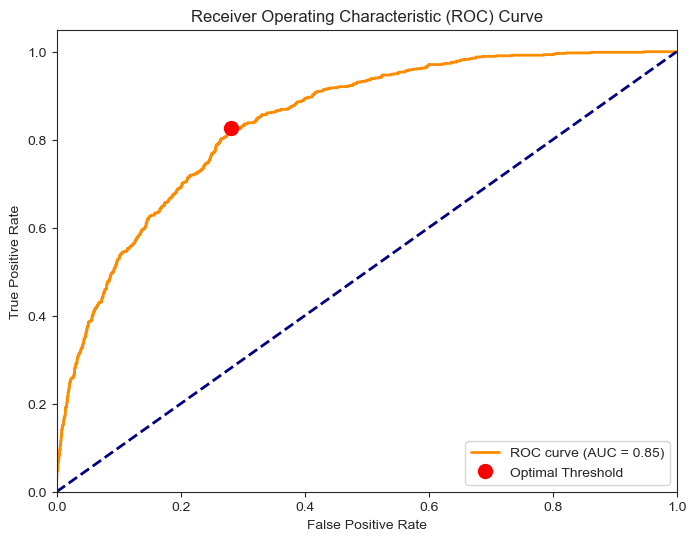

In [83]:
optimal_idx = np.argmax(xgb_tpr - xgb_fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

# Make predictions using the optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate confusion matrix and classification report using the optimal threshold
cm_optimal = confusion_matrix(y_true, y_pred_optimal)
report_optimal = classification_report(y_true, y_pred_optimal)

print("Confusion Matrix (Optimal Threshold):")
print(cm_optimal)
print("\nClassification Report (Optimal Threshold):")
print(report_optimal)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot the optimal threshold point on the ROC curve
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=10, label='Optimal Threshold')
plt.legend(loc="lower right")

plt.show()

### Random Forest
Bank dataset

ROC AUC Score: 0.7678913727491669
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7303
           1       0.54      0.29      0.38       935

    accuracy                           0.89      8238
   macro avg       0.73      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238

Random Forest confusion matrix: 
 [[7123  180]
 [ 666  269]]


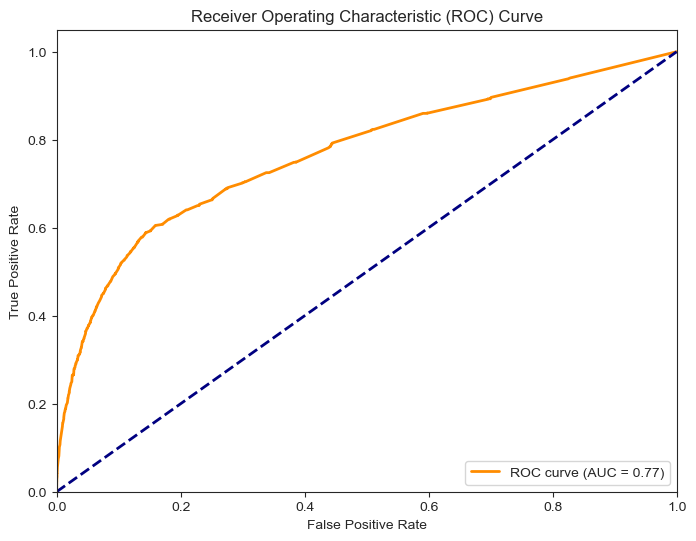

In [84]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_bank_train, y_bank_train)
rf_clf_pred = rf_clf.predict(X_bank_test)
rf_clf_report = classification_report(y_bank_test, rf_clf_pred)
rf_clf_cm = confusion_matrix(y_bank_test, rf_clf_pred)

y_true = y_bank_test
y_pred_proba = rf_clf.predict_proba(X_bank_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_bank_test, y_pred_proba)
roc_auc = roc_auc_score(y_true, y_pred_proba)
print("ROC AUC Score:", roc_auc)
print(rf_clf_report)
print("Random Forest confusion matrix: \n", xgb_clf_cm)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Optimal Threshold: 0.16
Confusion Matrix (Optimal Threshold):
[[6139 1164]
 [ 369  566]]

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      7303
           1       0.33      0.61      0.42       935

    accuracy                           0.81      8238
   macro avg       0.64      0.72      0.66      8238
weighted avg       0.87      0.81      0.84      8238



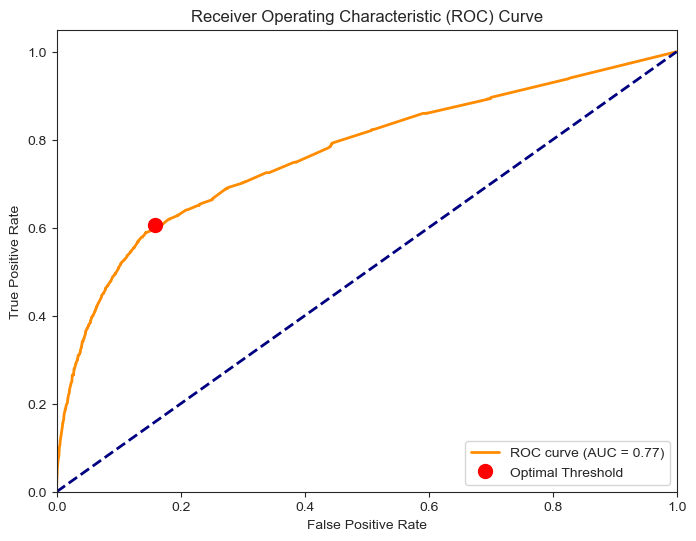

In [85]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

# Make predictions using the optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate confusion matrix and classification report using the optimal threshold
cm_optimal = confusion_matrix(y_true, y_pred_optimal)
report_optimal = classification_report(y_true, y_pred_optimal)

print("Confusion Matrix (Optimal Threshold):")
print(cm_optimal)
print("\nClassification Report (Optimal Threshold):")
print(report_optimal)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot the optimal threshold point on the ROC curve
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=10, label='Optimal Threshold')
plt.legend(loc="lower right")

plt.show()

[I 2024-05-24 19:03:41,496] A new study created in memory with name: no-name-603b6f90-f5d1-41bd-afe2-3194285dcb66
[I 2024-05-24 19:03:47,534] Trial 0 finished with value: 0.8976693372177713 and parameters: {'n_estimators': 473, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8976693372177713.
[I 2024-05-24 19:03:48,330] Trial 1 finished with value: 0.896698227725176 and parameters: {'n_estimators': 51, 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8976693372177713.
[I 2024-05-24 19:03:51,210] Trial 2 finished with value: 0.8976693372177713 and parameters: {'n_estimators': 380, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8976693372177713.
[I 2024-05-24 19:03:53,344] Trial 3 finished with value: 0.898154891964069 and parameters: {'n_estimators': 253, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 3 with value: 0

Random Forest Best Parameters:  {'n_estimators': 253, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 1}
Random Forest Best Score:  0.898154891964069
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.95      7303
           1       0.69      0.19      0.30       935

    accuracy                           0.90      8238
   macro avg       0.80      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238

Random Forest Confusion Matrix:
 [[7223   80]
 [ 759  176]]
Random Forest AUC:  0.7858921064598023


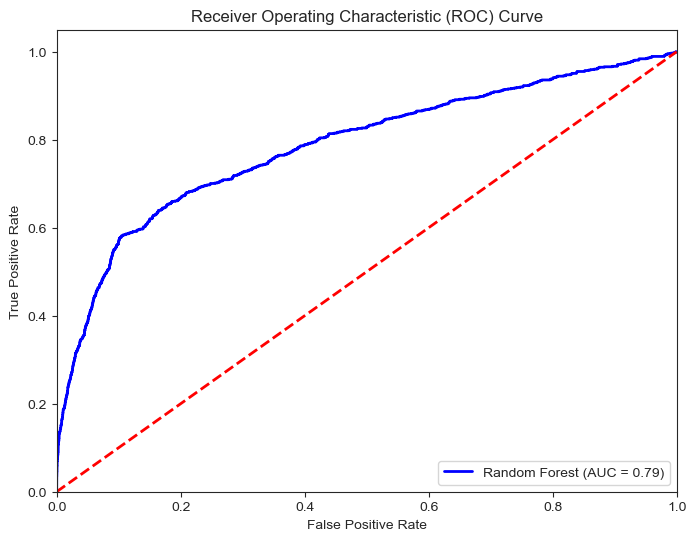

In [86]:
def rf_objective(trial):
    rf_params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 2, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
    }
    rf_clf = RandomForestClassifier(**rf_params, random_state=42)
    rf_clf.fit(X_bank_train, y_bank_train)
    rf_pred = rf_clf.predict(X_bank_test)
    accuracy = accuracy_score(y_bank_test, rf_pred)
    return accuracy

# Perform hyperparameter tuning for Random Forest classifier
rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(rf_objective, n_trials=10)

# Get the best parameters and best score for Random Forest classifier
rf_best_params = rf_study.best_params
rf_best_score = rf_study.best_value

# Train the Random Forest classifier with the best parameters
rf_best_clf = RandomForestClassifier(**rf_best_params, random_state=42)
rf_best_clf.fit(X_bank_train, y_bank_train)
rf_best_pred = rf_best_clf.predict(X_bank_test)

# Evaluate the Random Forest classifier
rf_report = classification_report(y_bank_test, rf_best_pred)
rf_cm = confusion_matrix(y_bank_test, rf_best_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_bank_test, rf_best_clf.predict_proba(X_bank_test)[:, 1])
rf_auc = roc_auc_score(y_bank_test, rf_best_clf.predict_proba(X_bank_test)[:, 1])

print("Random Forest Best Parameters: ", rf_best_params)
print("Random Forest Best Score: ", rf_best_score)
print("Random Forest Classification Report:\n", rf_report)
print("Random Forest Confusion Matrix:\n", rf_cm)
print("Random Forest AUC: ", rf_auc)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Optimal Threshold: 0.16
Confusion Matrix (Optimal Threshold):
[[6139 1164]
 [ 369  566]]

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      7303
           1       0.33      0.61      0.42       935

    accuracy                           0.81      8238
   macro avg       0.64      0.72      0.66      8238
weighted avg       0.87      0.81      0.84      8238



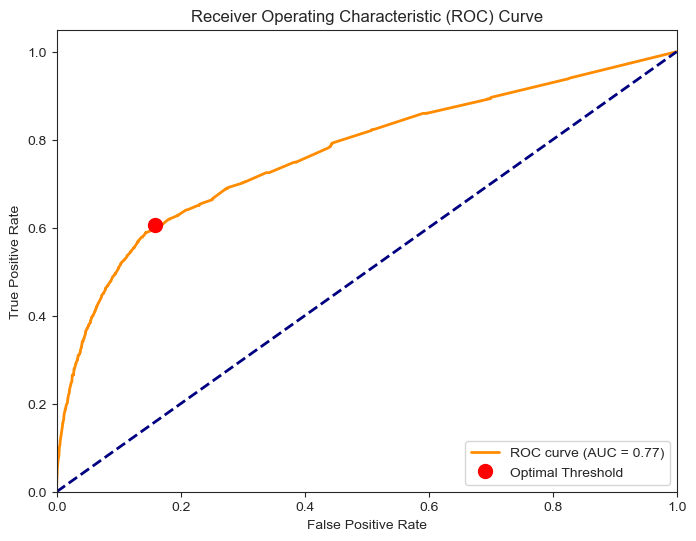

In [87]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

# Make predictions using the optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate confusion matrix and classification report using the optimal threshold
cm_optimal = confusion_matrix(y_true, y_pred_optimal)
report_optimal = classification_report(y_true, y_pred_optimal)

print("Confusion Matrix (Optimal Threshold):")
print(cm_optimal)
print("\nClassification Report (Optimal Threshold):")
print(report_optimal)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot the optimal threshold point on the ROC curve
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=10, label='Optimal Threshold')
plt.legend(loc="lower right")

plt.show()

Store dataset

ROC AUC Score: 0.8285427787794157
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7303
           1       0.54      0.29      0.38       935

    accuracy                           0.89      8238
   macro avg       0.73      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238

Random forest confusion matrix: 
 [[7123  180]
 [ 666  269]]


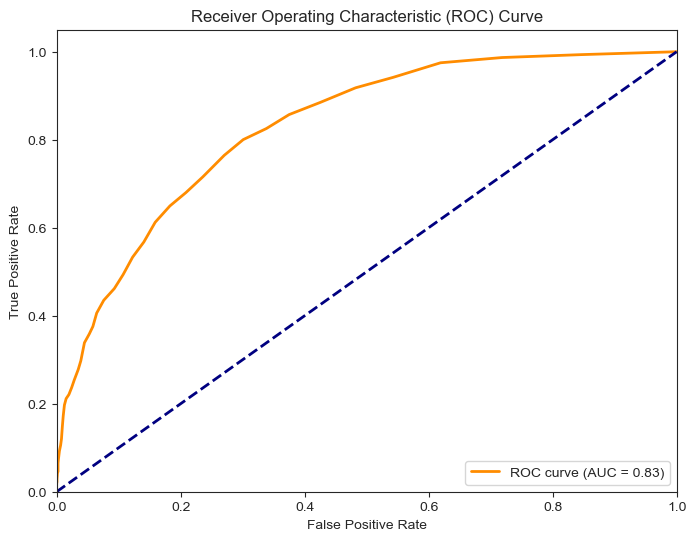

In [88]:
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)
rf_clf.fit(X_store_train, y_store_train)
rf_clf_store_pred = rf_clf.predict(X_store_test)
rf_clf_store_report = classification_report(y_store_test, rf_clf_store_pred)
rf_clf_store_cm = confusion_matrix(y_store_test, rf_clf_store_pred)

y_true = y_store_test
y_pred_proba = rf_clf.predict_proba(X_store_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_store_test, y_pred_proba)
roc_auc = roc_auc_score(y_true, y_pred_proba)
print("ROC AUC Score:", roc_auc)
print(rf_clf_report)
print("Random forest confusion matrix: \n", xgb_clf_cm)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Optimal Threshold: 0.18
Confusion Matrix (Optimal Threshold):
[[2511 1081]
 [ 151  605]]

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

           0       0.94      0.70      0.80      3592
           1       0.36      0.80      0.50       756

    accuracy                           0.72      4348
   macro avg       0.65      0.75      0.65      4348
weighted avg       0.84      0.72      0.75      4348



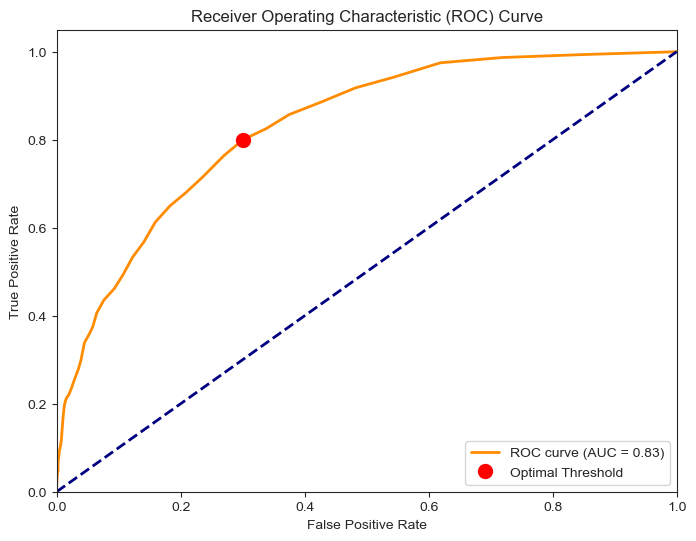

In [89]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

# Make predictions using the optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate confusion matrix and classification report using the optimal threshold
cm_optimal = confusion_matrix(y_true, y_pred_optimal)
report_optimal = classification_report(y_true, y_pred_optimal)

print("Confusion Matrix (Optimal Threshold):")
print(cm_optimal)
print("\nClassification Report (Optimal Threshold):")
print(report_optimal)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot the optimal threshold point on the ROC curve
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=10, label='Optimal Threshold')
plt.legend(loc="lower right")

plt.show()

Tuning

[I 2024-05-24 19:05:12,261] A new study created in memory with name: no-name-f3c7296f-c627-4973-9bbe-f9419a0a3f6d
[I 2024-05-24 19:05:14,488] Trial 0 finished with value: 0.8530358785648574 and parameters: {'n_estimators': 74, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8530358785648574.
[I 2024-05-24 19:05:17,995] Trial 1 finished with value: 0.8523459061637535 and parameters: {'n_estimators': 299, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8530358785648574.
[I 2024-05-24 19:05:21,709] Trial 2 finished with value: 0.8521159153633855 and parameters: {'n_estimators': 316, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8530358785648574.
[I 2024-05-24 19:05:22,874] Trial 3 finished with value: 0.8539558417663293 and parameters: {'n_estimators': 51, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 3 with value: 0

Random Forest Best Parameters:  {'n_estimators': 85, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 6}
Random Forest Best Score:  0.8548758049678012
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      3592
           1       0.72      0.27      0.40       756

    accuracy                           0.85      4348
   macro avg       0.79      0.62      0.66      4348
weighted avg       0.84      0.85      0.83      4348

Random Forest Confusion Matrix:
 [[3511   81]
 [ 550  206]]
Random Forest AUC:  0.8421274937839527


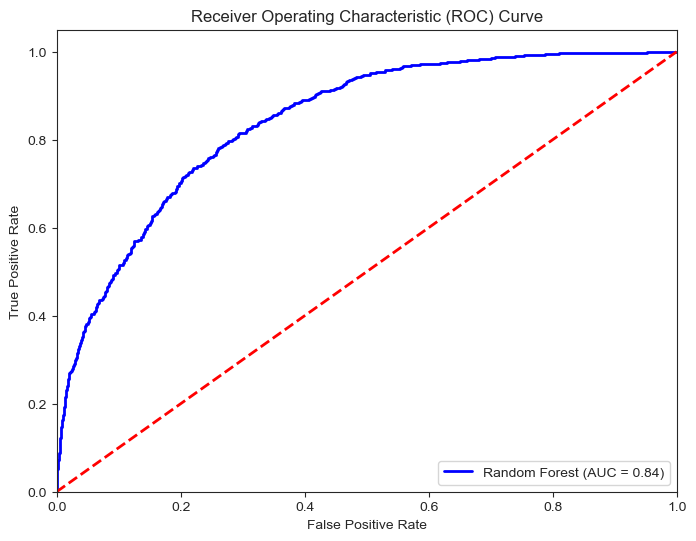

In [91]:
def rf_objective(trial):
    rf_params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 2, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
    }
    rf_clf = RandomForestClassifier(**rf_params, random_state=42)
    rf_clf.fit(X_store_train, y_store_train)
    rf_pred = rf_clf.predict(X_store_test)
    accuracy = accuracy_score(y_store_test, rf_pred)
    return accuracy

# Perform hyperparameter tuning for Random Forest classifier
rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(rf_objective, n_trials=10)

# Get the best parameters and best score for Random Forest classifier
rf_best_params = rf_study.best_params
rf_best_score = rf_study.best_value

# Train the Random Forest classifier with the best parameters
rf_best_clf = RandomForestClassifier(**rf_best_params, random_state=42)
rf_best_clf.fit(X_store_train, y_store_train)
rf_best_pred = rf_best_clf.predict(X_store_test)

# Evaluate the Random Forest classifier
rf_report = classification_report(y_store_test, rf_best_pred)
rf_cm = confusion_matrix(y_store_test, rf_best_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_store_test, rf_best_clf.predict_proba(X_store_test)[:, 1])
rf_auc = roc_auc_score(y_store_test, rf_best_clf.predict_proba(X_store_test)[:, 1])

print("Random Forest Best Parameters: ", rf_best_params)
print("Random Forest Best Score: ", rf_best_score)
print("Random Forest Classification Report:\n", rf_report)
print("Random Forest Confusion Matrix:\n", rf_cm)
print("Random Forest AUC: ", rf_auc)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Optimal Threshold: 0.18
Confusion Matrix (Optimal Threshold):
[[2511 1081]
 [ 151  605]]

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

           0       0.94      0.70      0.80      3592
           1       0.36      0.80      0.50       756

    accuracy                           0.72      4348
   macro avg       0.65      0.75      0.65      4348
weighted avg       0.84      0.72      0.75      4348



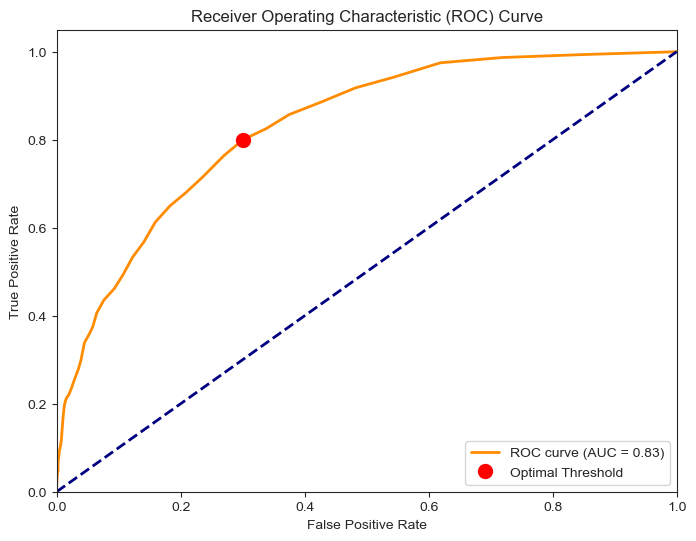

In [92]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

# Make predictions using the optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate confusion matrix and classification report using the optimal threshold
cm_optimal = confusion_matrix(y_true, y_pred_optimal)
report_optimal = classification_report(y_true, y_pred_optimal)

print("Confusion Matrix (Optimal Threshold):")
print(cm_optimal)
print("\nClassification Report (Optimal Threshold):")
print(report_optimal)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot the optimal threshold point on the ROC curve
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=10, label='Optimal Threshold')
plt.legend(loc="lower right")

plt.show()

### Linear Model

bank dataset

In [59]:
bank_data = pd.read_csv('bank-additional-full.csv',sep = ';').drop('duration',axis = 1)

X = bank_data[bank_data.columns[:-1]]
X = pd.get_dummies(X,drop_first=True)

y = bank_data['y']
mapping = {'no':0,'yes':1}
y = y.map(mapping)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

scaler = StandardScaler()
for i in range(len(yj_column)):
    X_train[yj_column[i]] = scaler.fit_transform(X_train[yj_column[i]].values.reshape(-1,1))
    X_test[yj_column[i]] = scaler.transform(X_test[yj_column[i]].values.reshape(-1,1))

In [60]:
reg.fit(X_train,y_train)
pred = reg.predict(X_test)
no_rate = len(y[y==0])/len(y)
training_result = reg.predict(X_train)
threshold = np.percentile(training_result, no_rate*100)
threshold

0.31324437951943773

In [57]:
yj_column = ['age','pdays','campaign','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

In [61]:
pred[pred<threshold] = 0
pred[pred>=threshold] = 1

In [62]:
accuracy = accuracy_score(y_test,pred)
confusion = confusion_matrix(y_test,pred)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("TP:", TP)
print ("TN:", TN)
print ("FP:", FP)
print ("FN:", FN)
print('accuracy:',accuracy)
precision = (TP/(TP+FP))
print('precision:',precision)
recall = (TP/(TP+FN))
print('recall:',recall)
F1_score = ((2*precision*recall)/(precision+recall))
print('F1_score:',F1_score)

[[6863  456]
 [ 485  434]]
TP: 434
TN: 6863
FP: 456
FN: 485
accuracy: 0.885773245933479
precision: 0.48764044943820223
recall: 0.4722524483133841
F1_score: 0.47982310668877826


In [64]:
reg = LassoCV(cv=5).fit(X_train, y_train)
pred = reg.predict(X_test)
pred[pred<threshold] = 0
pred[pred>=threshold] = 1
accuracy = accuracy_score(y_test,pred)
confusion = confusion_matrix(y_test,pred)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("TP:", TP)
print ("TN:", TN)
print ("FP:", FP)
print ("FN:", FN)
print('accuracy:',accuracy)
precision = (TP/(TP+FP))
print('precision:',precision)
recall = (TP/(TP+FN))
print('recall:',recall)
F1_score = ((2*precision*recall)/(precision+recall))
print('F1_score:',F1_score)

[[6863  456]
 [ 491  428]]
TP: 428
TN: 6863
FP: 456
FN: 491
accuracy: 0.8850449138140325
precision: 0.4841628959276018
recall: 0.4657236126224157
F1_score: 0.4747642817526345


In [66]:
from sklearn.linear_model import RidgeCV
reg = RidgeCV(cv=5,alphas=(0.1,1,3,5,8,10,20,50,100)).fit(X_train, y_train)
pred = reg.predict(X_test)
pred[pred<threshold] = 0
pred[pred>=threshold] = 1
accuracy = accuracy_score(y_test,pred)
confusion = confusion_matrix(y_test,pred)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("TP:", TP)
print ("TN:", TN)
print ("FP:", FP)
print ("FN:", FN)
print('accuracy:',accuracy)
precision = (TP/(TP+FP))
print('precision:',precision)
recall = (TP/(TP+FN))
print('recall:',recall)
F1_score = ((2*precision*recall)/(precision+recall))
print('F1_score:',F1_score)

[[6862  457]
 [ 488  431]]
TP: 431
TN: 6862
FP: 457
FN: 488
accuracy: 0.8852876911871813
precision: 0.48536036036036034
recall: 0.4689880304678999
F1_score: 0.4770337576092972


### Store dataset

In [67]:
store_data = pd.read_csv('store.csv',sep = ',')
X = store_data[store_data.columns[:-1]]
X = pd.get_dummies(X,drop_first=True)
y = store_data['RESP']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

yj_column = ['ZIP_CODE', 'FRE', 'MON', 'CC_CARD', 'AVRG', 'PC_CALC20', 'PSWEATERS',
       'PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES', 'PJACKETS', 'PCAR_PNTS',
       'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS', 'POUTERWEAR', 'PJEWELRY',
       'PFASHION', 'PLEGWEAR', 'PCOLLSPND', 'AMSPEND', 'PSSPEND', 'CCSPEND',
       'AXSPEND', 'TMONSPEND', 'OMONSPEND', 'SMONSPEND', 'PREVPD', 'GMP',
       'PROMOS', 'DAYS', 'FREDAYS', 'MARKDOWN', 'CLASSES', 'COUPONS', 'STYLES',
       'STORES', 'WEB', 'MAILED', 'RESPONDED', 'RESPONSERATE', 'HI',
       'LTFREDAY', 'CLUSTYPE', 'PERCRET', ]

scaler = StandardScaler()
for i in range(len(yj_column)):
    X_train[yj_column[i]] = scaler.fit_transform(X_train[yj_column[i]].values.reshape(-1,1))
    X_test[yj_column[i]] = scaler.transform(X_test[yj_column[i]].values.reshape(-1,1))

In [68]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
pred = reg.predict(X_test)
no_rate = len(y[y==0])/len(y)
training_result = reg.predict(X_train)
threshold = np.percentile(training_result, no_rate*100)
threshold

0.2899707361357129

In [69]:
pred[pred<threshold] = 0
pred[pred>=threshold] = 1
pred

array([0., 1., 0., ..., 0., 0., 0.])

In [70]:
accuracy = accuracy_score(y_test,pred)
confusion = confusion_matrix(y_test,pred)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("TP:", TP)
print ("TN:", TN)
print ("FP:", FP)
print ("FN:", FN)
print('accuracy:',accuracy)
precision = (TP/(TP+FP))
print('precision:',precision)
recall = (TP/(TP+FN))
print('recall:',recall)
F1_score = ((2*precision*recall)/(precision+recall))
print('F1_score:',F1_score)

[[3201  388]
 [ 396  363]]
TP: 363
TN: 3201
FP: 388
FN: 396
accuracy: 0.8196872125114996
precision: 0.4833555259653795
recall: 0.4782608695652174
F1_score: 0.48079470198675495


In [71]:
reg = LassoCV(cv=5).fit(X_train, y_train)
pred = reg.predict(X_test)
pred[pred<threshold] = 0
pred[pred>=threshold] = 1
accuracy = accuracy_score(y_test,pred)
confusion = confusion_matrix(y_test,pred)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("TP:", TP)
print ("TN:", TN)
print ("FP:", FP)
print ("FN:", FN)
print('accuracy:',accuracy)
precision = (TP/(TP+FP))
print('precision:',precision)
recall = (TP/(TP+FN))
print('recall:',recall)
F1_score = ((2*precision*recall)/(precision+recall))
print('F1_score:',F1_score)

[[3210  379]
 [ 401  358]]
TP: 358
TN: 3210
FP: 379
FN: 401
accuracy: 0.8206071757129715
precision: 0.48575305291723203
recall: 0.47167325428194995
F1_score: 0.4786096256684492


In [72]:
reg = RidgeCV(cv=5,alphas=(0.1,1,3,5,8,10,20,50,100)).fit(X_train, y_train)
pred = reg.predict(X_test)
pred[pred<threshold] = 0
pred[pred>=threshold] = 1
accuracy = accuracy_score(y_test,pred)
confusion = confusion_matrix(y_test,pred)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("TP:", TP)
print ("TN:", TN)
print ("FP:", FP)
print ("FN:", FN)
print('accuracy:',accuracy)
precision = (TP/(TP+FP))
print('precision:',precision)
recall = (TP/(TP+FN))
print('recall:',recall)
F1_score = ((2*precision*recall)/(precision+recall))
print('F1_score:',F1_score)

[[3204  385]
 [ 398  361]]
TP: 361
TN: 3204
FP: 385
FN: 398
accuracy: 0.8199172033118676
precision: 0.4839142091152815
recall: 0.4756258234519104
F1_score: 0.479734219269103


### Task 2

In [106]:
bank_data = pd.read_csv('bank-additional-full.csv', sep=';')
bank_data['age_group'] = pd.cut(bank_data['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '>60'])
store_data = pd.read_csv('store.csv')
store_data['income_level'] = pd.qcut(store_data['MON'], q=4, labels=['low', 'medium', 'high', 'very high'])

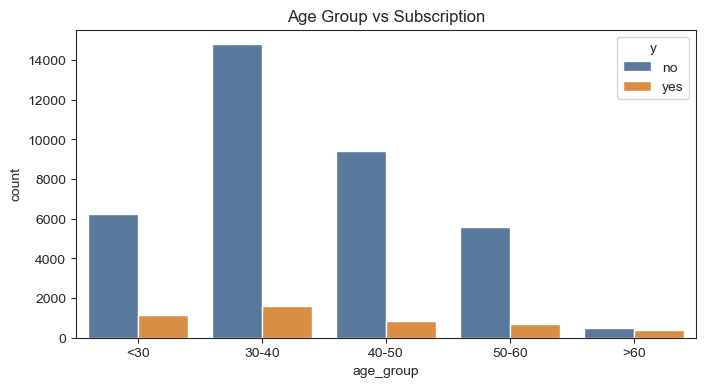

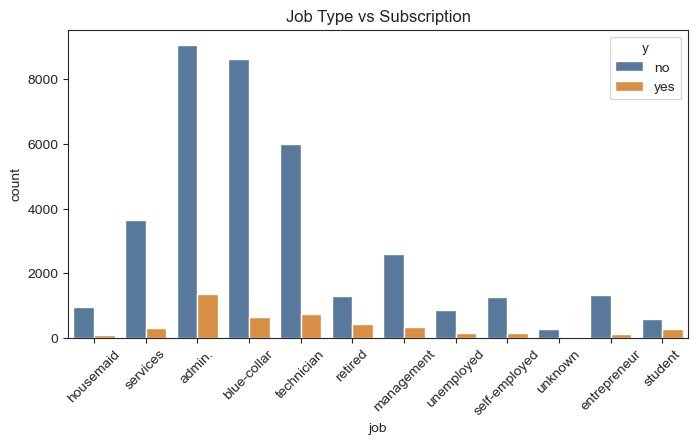

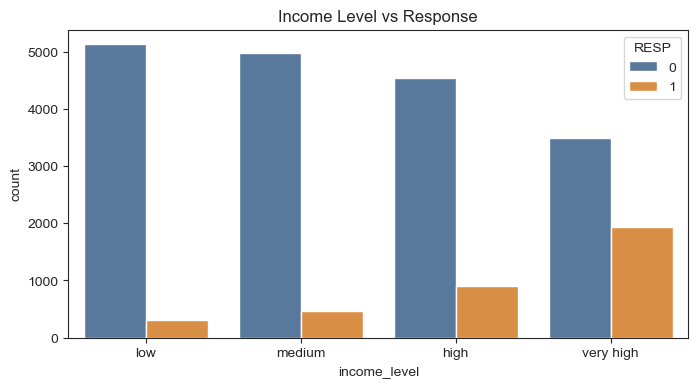

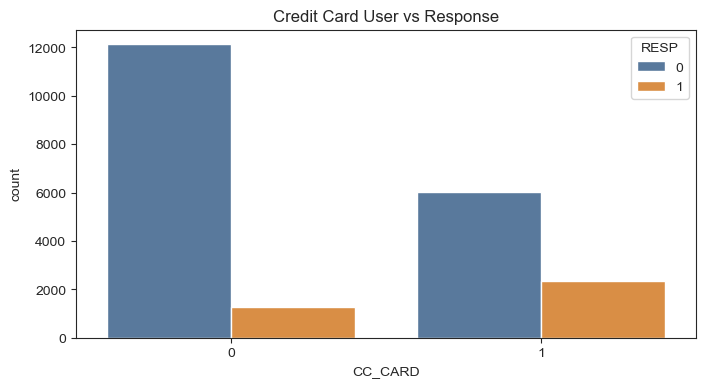

In [109]:
# bank age_group analysis
plt.figure(figsize=(8, 4))
sns.countplot(x='age_group', hue='y', data=bank_data)
plt.title('Age Group vs Subscription')
plt.show()

# bank job type analysis
plt.figure(figsize=(8, 4))
sns.countplot(x='job', hue='y', data=bank_data)
plt.title('Job Type vs Subscription')
plt.xticks(rotation=45)
plt.show()

# store income level analysys
plt.figure(figsize=(8, 4))
sns.countplot(x='income_level', hue='RESP', data=store_data)
plt.title('Income Level vs Response')
plt.show()

# store credit card user analysys
plt.figure(figsize=(8, 4))
sns.countplot(x='CC_CARD', hue='RESP', data=store_data)
plt.title('Credit Card User vs Response')
plt.show()

<Figure size 800x400 with 0 Axes>

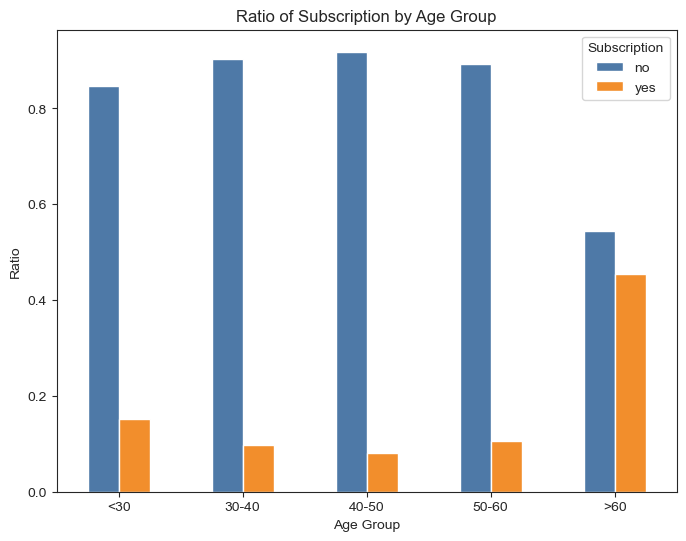

<Figure size 800x600 with 0 Axes>

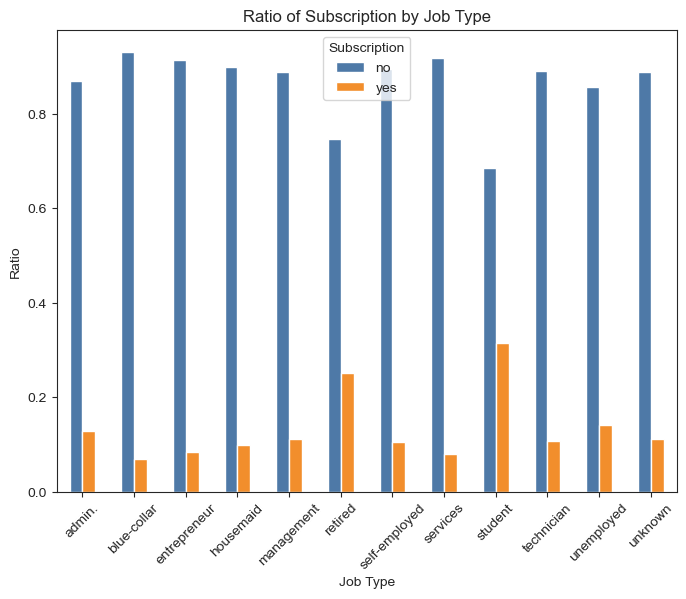

<Figure size 800x600 with 0 Axes>

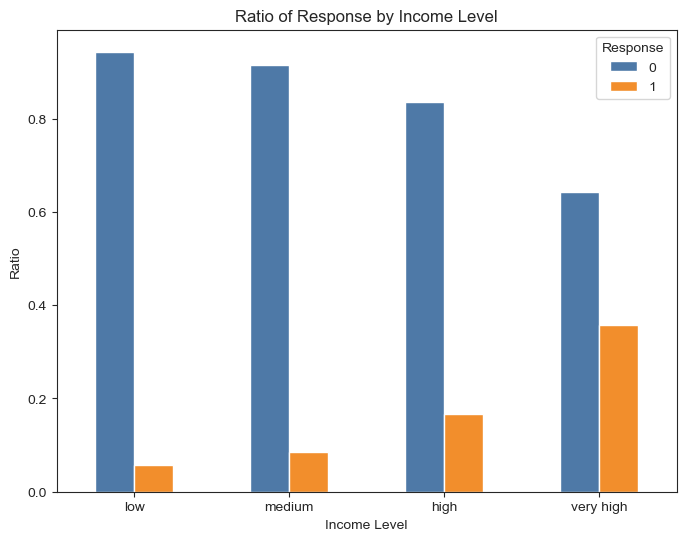

<Figure size 800x600 with 0 Axes>

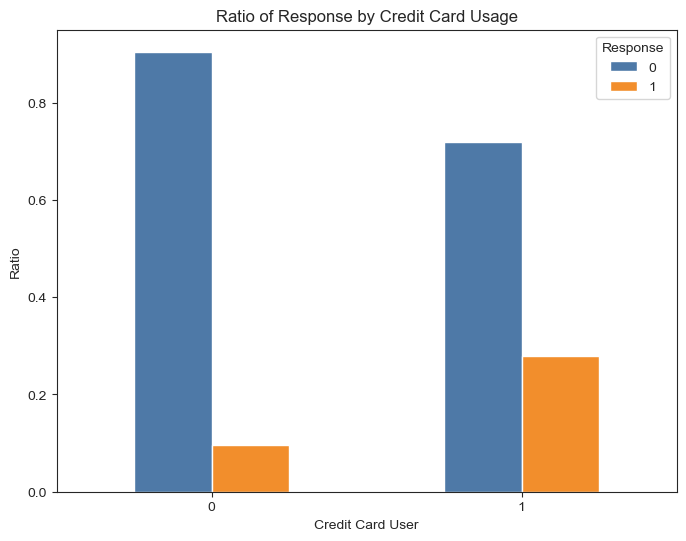

In [111]:
grouped = bank_data.groupby('age_group')['y'].value_counts(normalize=True).unstack()
# bank age_group analysis
plt.figure(figsize=(8, 4))
grouped.plot(kind='bar', rot=0, figsize=(8, 6))
plt.title('Ratio of Subscription by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Ratio')
plt.legend(title='Subscription')
plt.show()


# bank job type analysis
plt.figure(figsize=(8, 6))
grouped = bank_data.groupby('job')['y'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', rot=45, figsize=(8, 6))
plt.title('Ratio of Subscription by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Ratio')
plt.legend(title='Subscription')
plt.show()

# store income level analysis
plt.figure(figsize=(8, 6))
grouped = store_data.groupby('income_level')['RESP'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', rot=0, figsize=(8, 6))
plt.title('Ratio of Response by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Ratio')
plt.legend(title='Response')
plt.show()

# store credit card user analysis
plt.figure(figsize=(8, 6))
grouped = store_data.groupby('CC_CARD')['RESP'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', rot=0, figsize=(8, 6))
plt.title('Ratio of Response by Credit Card Usage')
plt.xlabel('Credit Card User')
plt.ylabel('Ratio')
plt.legend(title='Response')
plt.show()